# **Module 3: Random Variables**
In this module, we will better explore random variables with a focus on pseudorandom number generation. Random numbers serve as the foundation for numerous computational and statistical applications, including simulations, sampling methods, and uncertainty modeling. We’ll begin by examining how to generate uniform and non-uniform pseudorandom numbers, understanding the underlying algorithms, and implementing these in Python. The main topics are:
-Generation of uniform and non-uniform pseudorandom numbers;
-Transformations of random variables;
-Resampling: Bootstrap and Jackknife.

## **Uniform and Non-Uniform Distributions**

Random variables can follow different probability distributions, which describe the likelihood of various outcomes. These distributions are broadly categorized into **uniform** and **non-uniform** distributions based on how probabilities are assigned to the values of the random variable.

### Uniform Distributions

A uniform distribution is characterized by equal probabilities for all possible outcomes within a specified range. In other words, every value in the interval has the same likelihood of occurring. Uniform distributions can be either **discrete** or **continuous**:

1. **Discrete Uniform Distribution**:
    - A discrete uniform distribution assigns an equal probability to each value in a finite set.
    - Example: Rolling a fair six-sided die, where each face (1, 2, 3, 4, 5, 6) has a probability of $\frac{1}{6}$.
2. **Continuous Uniform Distribution**:
    - A continuous uniform distribution assigns equal probability density across an interval $[a, b]$.
    - The probability density function (PDF) is given by:
$ f(x) = \frac{1}{b-a}, \quad a \leq x < b $
    - Example: Generating random numbers between 0 and 1 using a pseudorandom number generator.

### Non-Uniform Distributions

Non-uniform distributions assign different probabilities to different values of the random variable. These distributions are used to model real-world phenomena where certain outcomes are more likely than others. Examples include:

1. **Normal Distribution**:
    - Also known as the Gaussian distribution, it is symmetric and bell-shaped.
    - Defined by two parameters: mean ($\mu$) and standard deviation ($\sigma
$).
    - The PDF is: \$\$ f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} \$\$
2. **Exponential Distribution**:
    - Models the time between events in a Poisson process.
    - Defined by the rate parameter ($\lambda$).
    - The PDF is: \$\$f(x) = \lambda e^{-\lambda x}, \quad x \geq 0\$\$
3. **Binomial Distribution**:
    The **Binomial Distribution** models the number of successes in $n$ independent trials, each with a probability of success $p$, for example, flipping a coin $n$ times. The probability of getting exactly $k$ successes is given by the probability mass function:
$$f(k; n, p) = \Pr(X = k) = \binom{n}{k} p^k (1-p)^{n-k}$$ where:

- $n$ is the number of trials.
- $k$ is the number of successes.
- $p$ is the probability of success on each trial.
- $\binom{n}{k} = \frac{n!}{k!(n-k)!} $ is the binomial coefficient.

4. **Poisson Distribution**:
The **Poisson Distribution** models the number of events occurring in a fixed interval of time or space, with an average rate of $\lambda$ events per interval. The probability of $k$ events occurring is given by:
$$ f(k; \lambda) = \Pr(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}$$ where:

- $k$ is the number of events.
- $\lambda$ is the average rate of events.

In both distributions, the parameters ($n$ and $p$ for Binomial, $\lambda$ for Poisson) define the shape and properties of the distribution. The Binomial distribution is used for discrete, countable events with a fixed number of trials, while the Poisson distribution models events occurring independently over time or space with a constant average rate.

Non-uniform distributions allow us to model data with specific characteristics, such as skewness, multimodality, or heavy tails.


## **Pseudorandom Number Generation**

In computational statistics, we don’t work with truly random numbers but rather with pseudorandom numbers—deterministic sequences that exhibit properties of randomness. These sequences are generated using mathematical algorithms that, while completely deterministic, produce values that pass statistical tests for randomness.

## Uniform Random Numbers

Uniform random numbers represent values distributed with equal probability across a specified range. NumPy provides an efficient way to generate uniform random numbers through its `random.uniform` function:


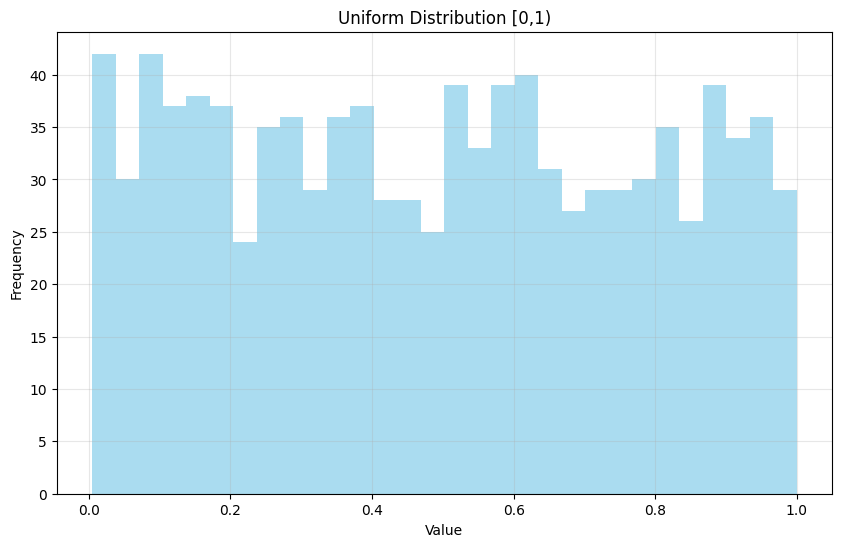

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate 1000 random numbers from uniform distribution [0,1)
uniform_samples = np.random.uniform(0, 1, 1000)

# Visualize the distribution
plt.figure(figsize=(10, 6))
plt.hist(uniform_samples, bins=30, alpha=0.7, color='skyblue')
plt.title('Uniform Distribution [0,1)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

The `np.random.uniform` function draws samples from a uniform distribution over the half-open interval $[low, high)$, which includes the lower boundary but excludes the upper boundary. The function takes parameters including the lower boundary (`low`, default 0.0), upper boundary (`high`, default 1.0), and the output shape (`size`) [5](https://numpy.org/doc/2.2/reference/random/generated/numpy.random.uniform.html).

## Multiplicative Congruential Method
The Multiplicative Congruential Method (MCM) is one of the simplest and most widely used algorithms for generating pseudorandom numbers. It belongs to a class of algorithms called Linear Congruential Generators (LCGs). MCM uses modular arithmetic to produce a sequence of numbers that appear random.

### Formula
The MCM generates pseudorandom numbers using the recurrence relation:
$$X_{n+1} = (a \cdot X_n) \mod m$$

Where:
- $ X_n $: The current random number (seed or state).
- $X_{n+1}$: The next random number in the sequence.
- $a$: The multiplier, which determines how the seed is transformed.
- $m$: The modulus, which sets the range of possible values for $X_n$.
- $X_0$: The initial seed value.

The generated sequence of numbers lies between $0$ and $m-1$. To scale these numbers to a desired range we divide each number by $m$.

#### Parameters Explained

The choice of parameters ($a$, $m$, and $X_0$) is critical for ensuring that the sequence has desirable properties such as long period and good statistical randomness.

#### Modulus ($m$)

- Determines the range of possible values for $X_n$.
- Larger values of $m$ result in longer periods (the length before the sequence starts repeating).
- Common choices include powers of 2 (e.g., $m = 2^{31}-1$) or prime numbers.

#### Multiplier ($a$)

- Determines how each value in the sequence is transformed.
- Should be chosen carefully to ensure that the sequence has maximum period length.
- A common choice is $a = 16807$, which provides good statistical properties when combined with appropriate modulus values.

#### Seed ($X_0$)

- The initial value that starts the sequence.
- Different seeds produce different sequences.
- To ensure reproducibility, it’s common to use fixed seeds for testing.

#### Period Length

The period length refers to how many numbers are generated before the sequence starts repeating. For maximum period length:

1. $m > 0$
2. The multiplier $a$ should be chosen such that it satisfies certain mathematical properties related to modular arithmetic.


First few pseudorandom numbers: [0.00032870750889587566, 0.5245871020129822, 0.7354235321913956, 0.26330554078487006, 0.37622397131110724, 0.19628582577979464, 0.9758738810084173, 0.512318108469396, 0.5304490451377114, 0.2571016295147602]


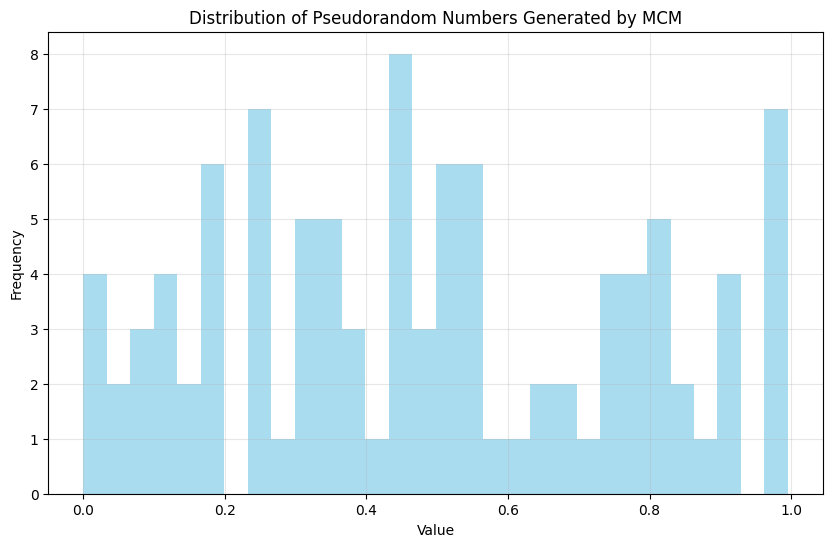

In [ ]:
def multiplicative_congruential_method(seed, a, m, n):
    """
    Generate pseudorandom numbers using the Multiplicative Congruential Method.

    Parameters:
    -----------
    seed : int
        Initial seed value (X_0)
    a : int
        Multiplier
    m : int
        Modulus
    n : int
        Number of random numbers to generate

    Returns:
    --------
    random_numbers : list
        List of pseudorandom numbers in [0, 1)
    """
    # Initialize list to store random numbers
    random_numbers = []

    # Start with seed value
    X = seed

    for _ in range(n):
        # Generate next number in sequence
        X = (a * X) % m

        # Scale to [0, 1)
        random_numbers.append(X / m)

    return random_numbers

# Parameters for MCM
seed = 42       # Initial seed value
a = 16807       # Multiplier
m = 2**31 - 1   # Modulus (large prime number)
n = 100         # Number of random numbers to generate

# Generate pseudorandom numbers
random_numbers = multiplicative_congruential_method(seed, a, m, n)

# Print first few random numbers
print("First few pseudorandom numbers:", random_numbers[:10])

# Visualize distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(random_numbers, bins=30, alpha=0.7, color='skyblue')
plt.title('Distribution of Pseudorandom Numbers Generated by MCM')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()


###Properties and Limitations
####Advantages
- Simple and computationally efficient.

- Can produce sequences with long periods if parameters are chosen correctly.

- Easy to implement and widely used in applications requiring pseudorandom number generation.

####Limitations
- Poor randomness if parameters are not carefully chosen.

- Correlations between successive values can occur if modulus or multiplier are poorly selected.

- Not suitable for cryptographic applications due to predictability.
<br>
Example Application: Simulating Sensor Data



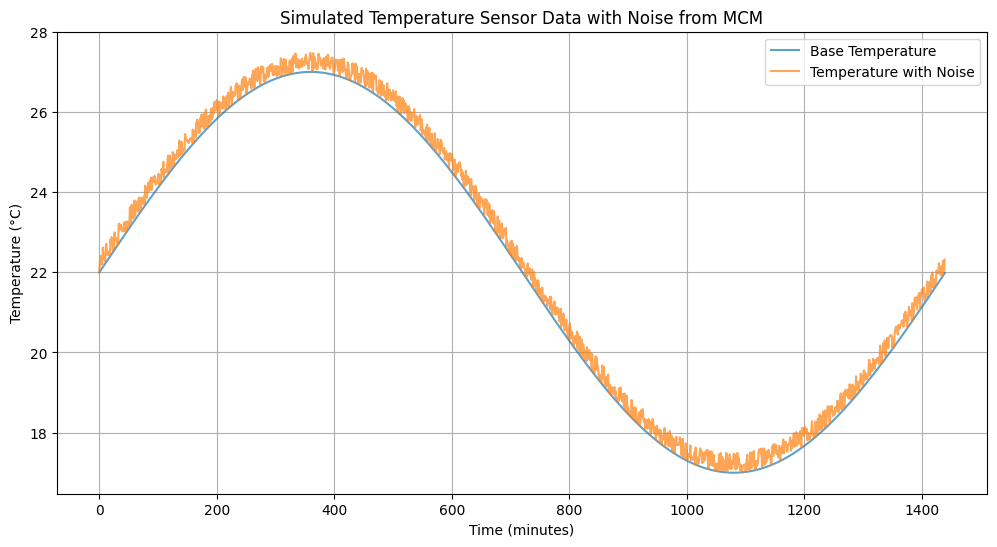

In [ ]:
# Simulate temperature sensor data with noise from MCM
base_temp = [22 + 5 * np.sin(2 * np.pi * t / (24 * 60)) for t in range(1440)]  # Daily cycle

# Generate noise using MCM
noise_mcm = multiplicative_congruential_method(seed=42, a=16807, m=2**31 - 1, n=1440)
scaled_noise = [n * 0.5 for n in noise_mcm]  # Scale noise to [-0.25, +0.25]

# Add noise to base temperature readings
temp_with_noise = [base + noise for base, noise in zip(base_temp, scaled_noise)]

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(range(1440), base_temp, label='Base Temperature', alpha=0.7)
plt.plot(range(1440), temp_with_noise, label='Temperature with Noise', alpha=0.7)
plt.title('Simulated Temperature Sensor Data with Noise from MCM')
plt.xlabel('Time (minutes)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


## **Non-uniform Random Number Generation**

While uniform random numbers provide a foundation, many practical applications require numbers from non-uniform distributions (e.g., normal, exponential, Poisson). Various methods exist to transform uniform random numbers into non-uniform ones.

### 1. Inverse Transform Sampling

Inverse transform sampling is a fundamental technique for generating random numbers from **any probability distribution** with a known cumulative distribution function (CDF).

The basic principle is:

1.  Generate a random number $U$ from a uniform distribution

2.  Compute $X = F^{-1}(U)$, where $F^{-1}$ is the inverse of the CDF

This works because if $U$ is uniformly distributed on $[1]$, then
$F^{-1}(U)$ follows the distribution with CDF $F$.

Here’s a Python implementation for inverse transform sampling:



In [ ]:
import numpy as np
import scipy.interpolate as interpolate

def inverse_transform_sampling(data, n_bins=40, n_samples=1000):
    """
    Generate samples from arbitrary data using inverse transform sampling.

    Parameters:
    -----------
    data : array-like
        Data from which to sample
    n_bins : int
        Number of bins to use in histogram
    n_samples : int
        Number of samples to generate

    Returns:
    --------
    samples : ndarray
        Generated samples
    """
    # Create histogram and calculate cumulative distribution
    hist, bin_edges = np.histogram(data, bins=n_bins, density=True)
    cum_values = np.zeros(bin_edges.shape)
    cum_values[1:] = np.cumsum(hist*np.diff(bin_edges))

    # Create interpolated inverse CDF
    inv_cdf = interpolate.interp1d(cum_values, bin_edges)

    # Generate uniform random numbers and transform them
    r = np.random.rand(n_samples)
    return inv_cdf(r)


### 2. Box-Muller Algorithm

The Box-Muller algorithm is a classic method for generating **normally distributed** random variables from uniform random variables. The algorithm generates pairs of independent standard normal random variables, X and Y, each time it is applied:

1. **Standard Normal**: Both X and Y follow a standard normal distribution, also known as a Gaussian distribution, with a mean of 0 and a standard deviation of 1. This distribution is symmetric around the mean and has a characteristic bell shape.
2. **Independent**: X and Y are statistically independent of each other. This means that knowing the value of one variable does not provide any information about the value of the other. In other words, the occurrence of one does not influence the probability distribution of the other.

The Box-Muller algorithm transforms two independent uniform random variables (U1 and U2) into two independent standard normal random variables (X and Y) using the following formulas:

$$ X = \sqrt{-2\ln(U_1)} \cos(2\pi U_2)$$

$$Y = \sqrt{-2\ln(U_1)} \sin(2\pi U_2)$$

This transformation is useful because it allows for the efficient generation of standard normal random variables, which are essential in many statistical and computational applications.

The algorithm steps are:

1. Generate two independent uniform random variables $
U_1, U_2 \sim \text{uniform}(0,1) $
2. Calculate $R = \sqrt{-2\ln(U_1)}$ and $\theta = 2\pi U_2$
3. Compute $X = R\cos(\theta)$ and $Y = R\sin(\theta)$
The resulting $X$ and $Y$ are independent, standard normal random variables.

#### Purpose of Transformation

1. **Generating Standard Normal Variables**: Standard normal variables are crucial in many statistical analyses, simulations, and modeling applications. They serve as a baseline for understanding and comparing other distributions due to their well-defined properties (mean = 0, standard deviation = 1).
2. **Versatility in Modeling**: Standard normal distributions are used extensively in statistical inference, hypothesis testing, and confidence interval construction. By generating these variables from uniform ones, the Box-Muller algorithm provides a versatile tool for simulating complex phenomena.
3. **Efficient Simulation**: The algorithm allows for efficient generation of standard normal variables, which is essential in Monte Carlo simulations, risk analysis, and machine learning applications where large datasets are simulated.

#### Difference Between Uniform and Standard Normal Random Variables

##### Uniform Random Variables

1. **Definition**: Uniform random variables are distributed evenly across a specified interval. Each value within this interval has an equal probability of being selected.
2. **Probability Density Function (PDF)**: For a uniform distribution on the interval [a, b], the PDF is given by:
$$ f(x) = \frac{1}{b-a}, \quad a \leq x \leq b $$

Outside this interval, the PDF is zero.
3. **Use Cases**: Uniform distributions are used in simulations where every outcome is equally likely, such as rolling a fair die or generating random numbers for cryptographic purposes.

##### Standard Normal Random Variables

1. **Definition**: Standard normal random variables follow a Gaussian distribution with a mean of 0 and a standard deviation of 1. This distribution is symmetric around the mean and has a characteristic bell shape.
2. **Probability Density Function (PDF)**: The PDF of a standard normal distribution is given by:
$$ f(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} $$

This function describes how the probability density decreases as you move away from the mean.
3. **Use Cases**: Standard normal distributions are fundamental in statistics for hypothesis testing, confidence intervals, and regression analysis. They are also used in finance to model stock prices and in engineering to model errors.

#### Key Differences

- **Shape and Symmetry**: Uniform distributions are flat and rectangular, while standard normal distributions are bell-shaped and symmetric around the mean.
- **Probability Distribution**: Uniform distributions assign equal probabilities to all values within a range, whereas standard normal distributions concentrate probability around the mean, with decreasing probabilities as you move away from it.
- **Applications**: Uniform distributions are used for simulations requiring equal likelihoods, while standard normal distributions are used for modeling phenomena with a central tendency and variability.



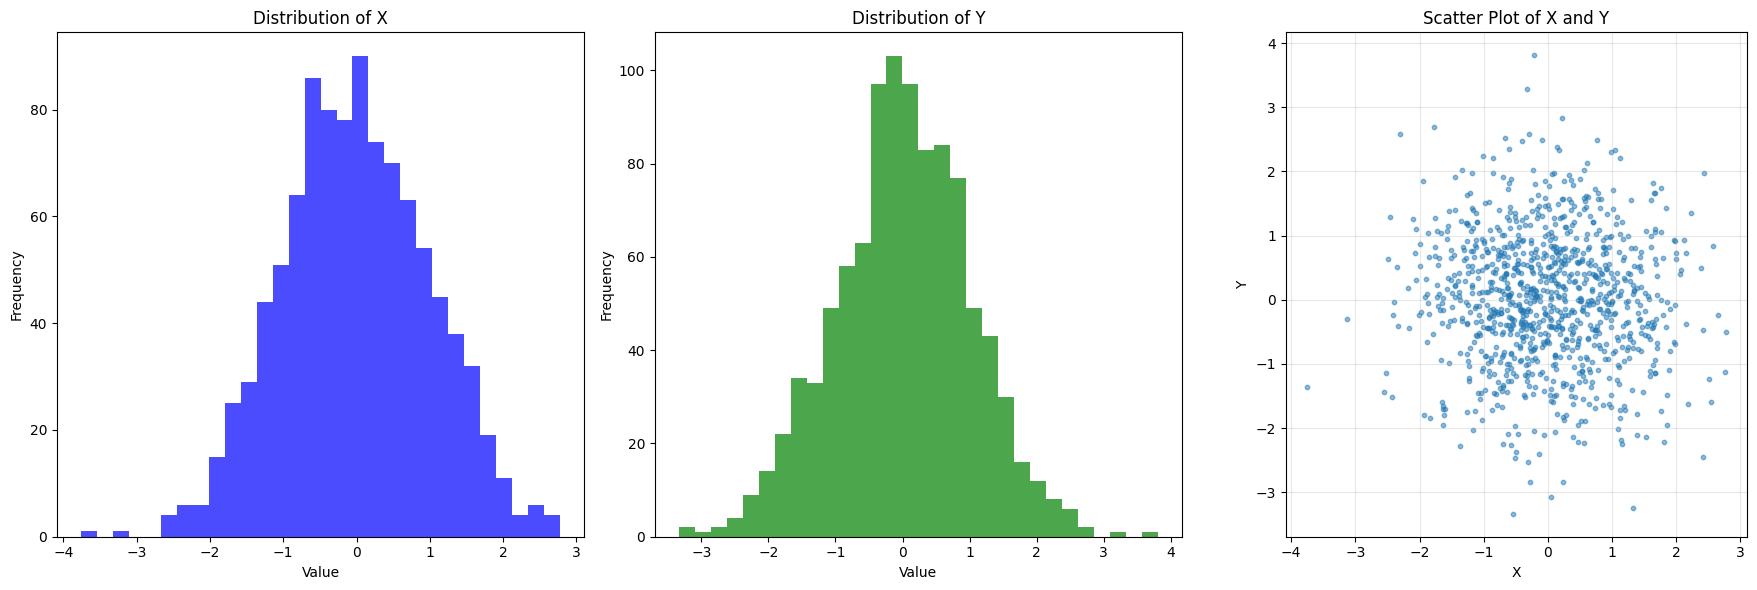

In [ ]:
def box_muller(mu=0, sigma=1, n_samples=1000, seed=None):
    """
    Generate normally distributed random variables using Box-Muller transform.

    Parameters:
    -----------
    mu : float
        Mean of the normal distribution
    sigma : float
        Standard deviation of the normal distribution
    n_samples : int
        Number of samples to generate
    seed : int, optional
        Random seed for reproducibility

    Returns:
    --------
    samples : ndarray
        Array of shape (n_samples, 2) containing normally distributed samples
    """
    # Set random seed if provided
    rng = np.random.RandomState(seed)

    # Generate half the required number of samples
    half_samples = n_samples // 2
    s = rng.uniform(0, 1, half_samples)
    t = rng.uniform(0, 1, half_samples)

    # Calculate R and Theta
    r = np.sqrt(-2 * np.log(s))
    theta = 2 * np.pi * t

    # Generate normal samples
    x = mu + sigma * r * np.cos(theta)
    y = mu + sigma * r * np.sin(theta)

    # Stack samples and return
    return np.vstack((x, y)).T

# Generate samples using Box-Muller
samples = box_muller(n_samples=2000)
x = samples[:, 0]
y = samples[:, 1]

# Create plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Histogram of X values
ax1.hist(x, bins=30, alpha=0.7, color='blue')
ax1.set_title('Distribution of X')
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')

# Histogram of Y values
ax2.hist(y, bins=30, alpha=0.7, color='green')
ax2.set_title('Distribution of Y')
ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')

# Scatter plot of X and Y
ax3.scatter(x, y, alpha=0.5, s=10)
ax3.set_title('Scatter Plot of X and Y')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_aspect('equal')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## **Sampling from Discrete Distributions**

Sampling from discrete distributions is a fundamental task in statistical computing, where the goal is to generate random samples that follow a specific discrete probability distribution. Discrete distributions are used to model phenomena with a finite or countable number of outcomes, such as coin tosses, dice rolls, or categorical data.

### Uniform Sampling with Replacement

Uniform sampling with replacement involves selecting items from a population where each item has an equal chance of being chosen, and the same item can be selected multiple times. This process is akin to drawing balls from a bag with replacement, where after each draw, the ball is put back into the bag.

**Key Features:**

1. **Equal Probability**: Each item in the population has the same probability of being selected.
2. **Replacement**: After each selection, the item is returned to the population, so it can be selected again.
3. **Independence**: Each draw is independent of the others.

### Uniform Sampling without Replacement

Uniform sampling without replacement involves selecting items from a population where each item has an equal chance of being chosen, but once an item is selected, it cannot be chosen again. This is similar to drawing balls from a bag without replacement.

**Key Features:**

1. **Equal Probability**: Initially, each item has the same probability of being selected.
2. **No Replacement**: After an item is selected, it is removed from the population.
3. **Dependence**: The probability of selecting an item changes after each draw, as the population size decreases.

### Non-Uniform Sampling with Replacement

Non-uniform sampling with replacement involves selecting items from a population where each item does not have an equal chance of being chosen, and the same item can be selected multiple times. This is useful when certain items are more likely to be selected based on predefined probabilities.

**Key Features:**

1. **Non-Equal Probability**: Items have different probabilities of being selected.
2. **Replacement**: After each selection, the item is returned to the population.
3. **Independence**: Each draw is independent of the others.

In summary:

- **Uniform Sampling with Replacement**: Each item has an equal chance of being selected, and items can be selected multiple times.
- **Uniform Sampling without Replacement**: Each item has an equal initial chance of being selected, but once selected, it cannot be chosen again.
- **Non-Uniform Sampling with Replacement**: Items have different probabilities of being selected, and items can be selected multiple times.

These methods are essential in statistical analysis, simulations, and data science applications, allowing for different types of sampling based on the requirements of the problem.
<br> <br>
NumPy’s `random.choice` function allows sampling from discrete distributions, both with uniform and non-uniform probabilities. This function is particularly useful for sampling from finite discrete distributions with specified
probabilities [6](https://www.w3resource.com/python-exercises/numpy/basic/numpy-basic-exercise-49.php).



In [ ]:
import numpy as np

# Uniform sampling with replacement
print("Uniform sampling with replacement:")
print(np.random.choice(7, 5))

# Uniform sampling without replacement
print("\nUniform sampling without replacement:")
print(np.random.choice(7, 5, replace=False))

# Non-uniform sampling with custom probabilities
print("\nNon-uniform sampling with replacement:")
print(np.random.choice(7, 5, p=[0.1, 0.2, 0, 0.2, 0.4, 0, 0.1]))


Uniform sampling with replacement:
[1 4 0 6 4]

Uniform sampling without replacement:
[6 3 2 0 1]

Non-uniform sampling with replacement:
[6 4 3 4 4]


## Application to Sensor Data Simulation

Let’s apply these techniques to simulate sensor data, building on our previous examples. We’ll create a temperature sensor simulation with various noise profiles.


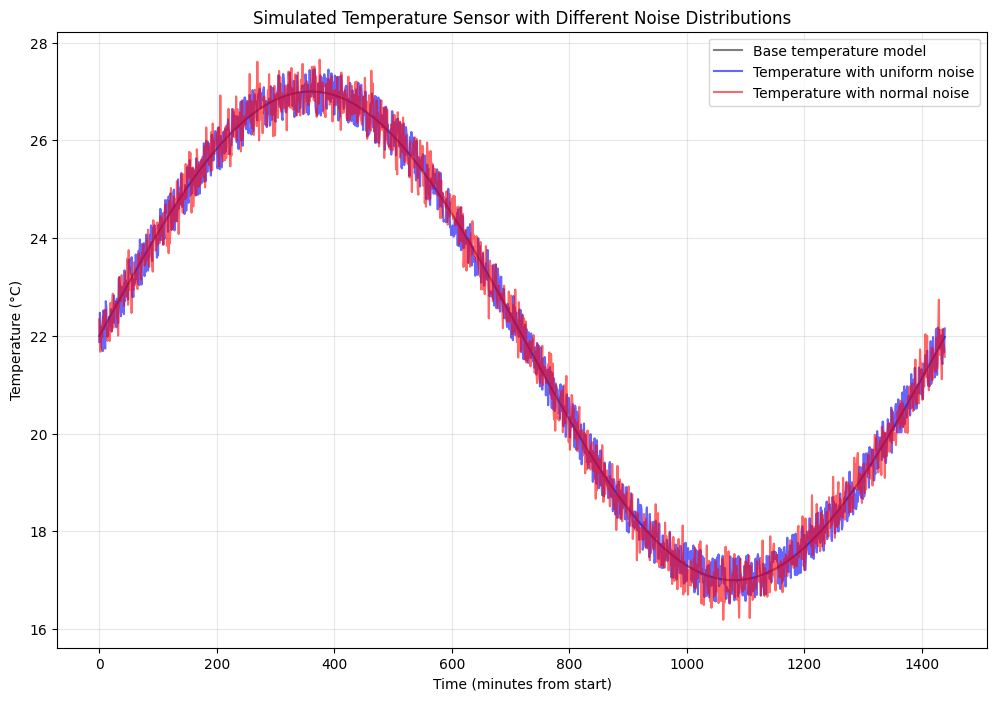

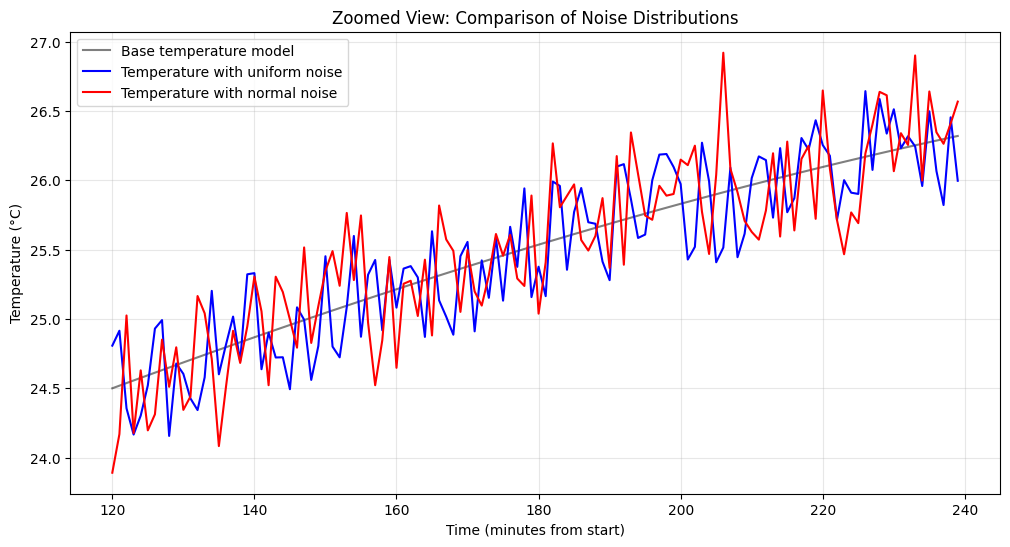

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Set seed for reproducibility
np.random.seed(42)

# Create time series (1 sample per minute for 24 hours)
start_time = datetime(2025, 3, 1, 0, 0)
timestamps = [start_time + timedelta(minutes=i) for i in range(24*60)]
time_indices = np.arange(len(timestamps))

# Base temperature model (daily cycle)
base_temp = 22 + 5 * np.sin(2 * np.pi * time_indices / (24 * 60))

# Generate different types of noise
uniform_noise = np.random.uniform(-0.5, 0.5, len(time_indices))


# Use Box-Muller for normal noise
normal_samples = box_muller(mu=0, sigma=0.3, n_samples=2*len(time_indices))
normal_noise = normal_samples[:len(time_indices), 0]

# Generate temperature readings with different noise profiles
temp_uniform = base_temp + uniform_noise
temp_normal = base_temp + normal_noise

# Plot the data
plt.figure(figsize=(12, 8))

# Plot base temperature
plt.plot(time_indices, base_temp, 'k-', alpha=0.5, label='Base temperature model')

# Plot temperatures with different noise distributions
plt.plot(time_indices, temp_uniform, 'b-', alpha=0.6, label='Temperature with uniform noise')
plt.plot(time_indices, temp_normal, 'r-', alpha=0.6, label='Temperature with normal noise')

# Add details to the plot
plt.xlabel('Time (minutes from start)')
plt.ylabel('Temperature (°C)')
plt.title('Simulated Temperature Sensor with Different Noise Distributions')
plt.legend()
plt.grid(True, alpha=0.3)

# Show a zoomed section for better visibility of noise differences
plt.figure(figsize=(12, 6))
start_idx, end_idx = 120, 240  # 2-hour window
plt.plot(time_indices[start_idx:end_idx], base_temp[start_idx:end_idx], 'k-', alpha=0.5, label='Base temperature model')
plt.plot(time_indices[start_idx:end_idx], temp_uniform[start_idx:end_idx], 'b-', label='Temperature with uniform noise')
plt.plot(time_indices[start_idx:end_idx], temp_normal[start_idx:end_idx], 'r-', label='Temperature with normal noise')
plt.xlabel('Time (minutes from start)')
plt.ylabel('Temperature (°C)')
plt.title('Zoomed View: Comparison of Noise Distributions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### **Comparing Multiple Methods for Generating Normal Random Numbers**

- **Computational Efficiency**:
    - **NumPy's Built-in Normal**: Generally the fastest due to optimized implementation.
    - **Box-Muller**: Efficient but requires generating two uniform variables for each pair of normal variables.
    - **Inverse Transform**: Can be slower due to the need to compute or approximate the inverse CDF.
- **Statistical Properties**:
    - All three methods should produce statistically equivalent results in terms of mean, variance, and distribution shape.
    - However, the quality of the random number generator used for uniform variables can affect the results.
- **Flexibility**:
    - **Inverse Transform**: Highly flexible as it can be applied to any distribution with a known inverse CDF.
    - **Box-Muller**: Limited to generating pairs of normal variables.
    - **NumPy's Built-in Normal**: Convenient for normal distributions but less flexible for other distributions.

In summary, the choice between Box-Muller, NumPy's built-in normal, and the inverse transform method depends on your specific needs:

- **Box-Muller**: Useful for generating pairs of normal variables, but less efficient than NumPy's built-in method.
- **NumPy's Built-in Normal**: Fast and convenient for generating normal random numbers.
- **Inverse Transform**: Highly flexible for generating random numbers from any distribution with a known inverse CDF.

Each method has its strengths and is suited to different scenarios in statistical computing and simulations.


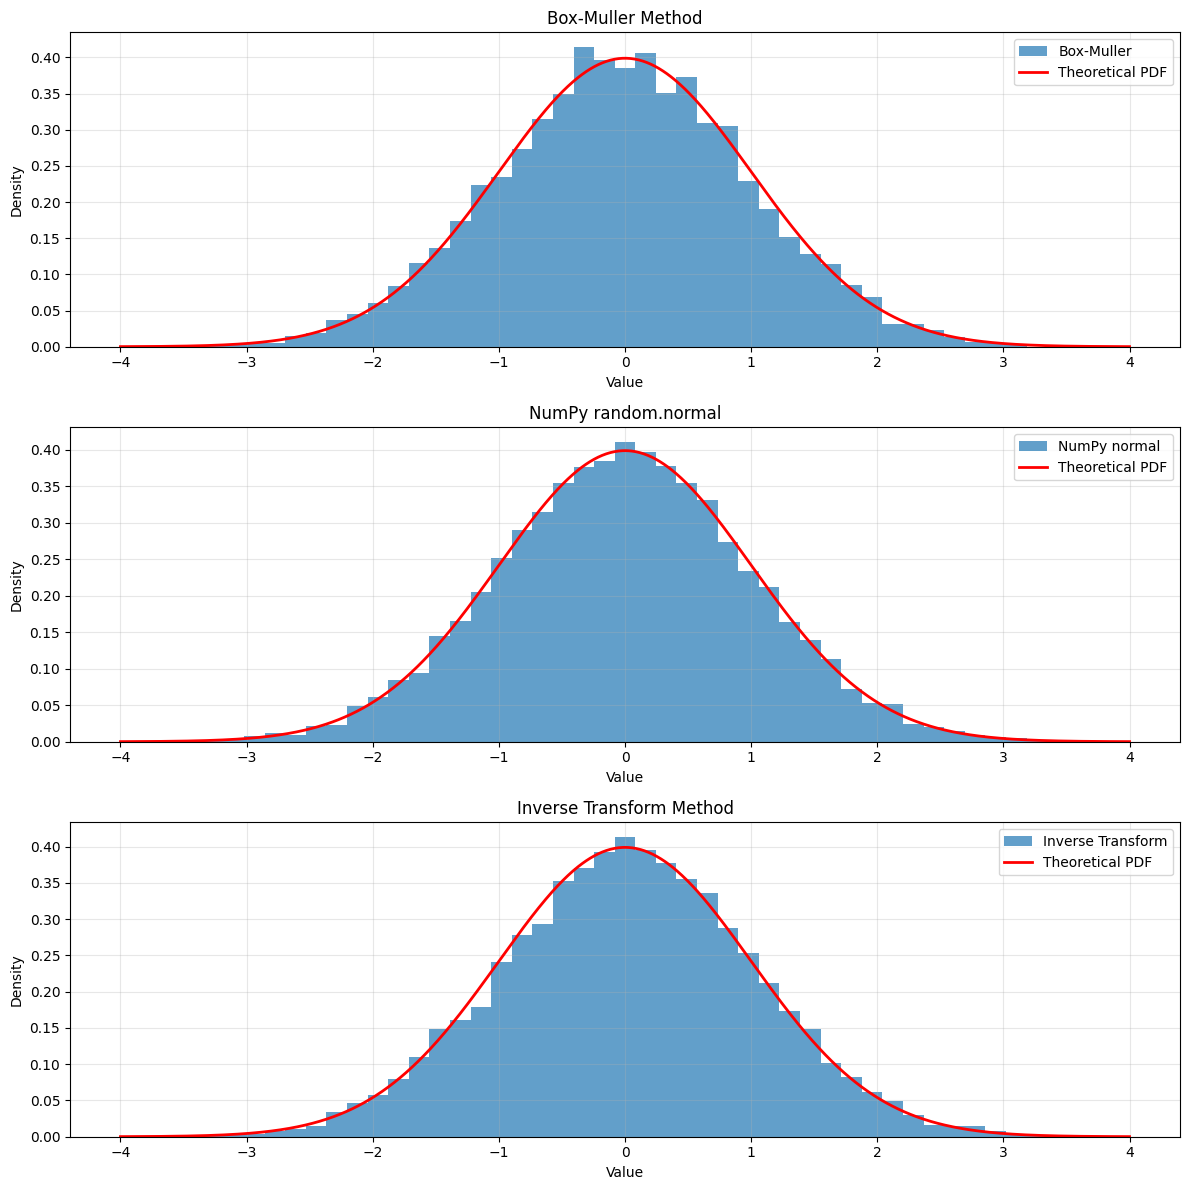

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set seed for reproducibility
np.random.seed(42)

# Sample size
n_samples = 10000

# Generate normal samples using Box-Muller
bm_samples = box_muller(mu=0, sigma=1, n_samples=n_samples)[:,0]

# Generate normal samples using NumPy's normal
np_samples = np.random.normal(0, 1, n_samples)

# Generate normal samples using inverse transform sampling
def inverse_normal(size):
    u = np.random.uniform(0, 1, size)
    # Using the inverse CDF of standard normal
    return norm.ppf(u)

it_samples = inverse_normal(n_samples)

# Create comparison plot
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Plot histograms
bins = np.linspace(-4, 4, 50)
axes[0].hist(bm_samples, bins=bins, alpha=0.7, density=True, label='Box-Muller')
axes[0].set_title('Box-Muller Method')
axes[0].grid(True, alpha=0.3)

axes[1].hist(np_samples, bins=bins, alpha=0.7, density=True, label='NumPy normal')
axes[1].set_title('NumPy random.normal')
axes[1].grid(True, alpha=0.3)

axes[2].hist(it_samples, bins=bins, alpha=0.7, density=True, label='Inverse Transform')
axes[2].set_title('Inverse Transform Method')
axes[2].grid(True, alpha=0.3)

# Add theoretical normal curve to each plot
x = np.linspace(-4, 4, 1000)
normal_pdf = norm.pdf(x)
for ax in axes:
    ax.plot(x, normal_pdf, 'r-', lw=2, label='Theoretical PDF')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.legend()

plt.tight_layout()
plt.show()


### **Performance Considerations**

Different methods for generating random numbers have different computational characteristics. Let’s examine the performance of the methods we’ve explored:


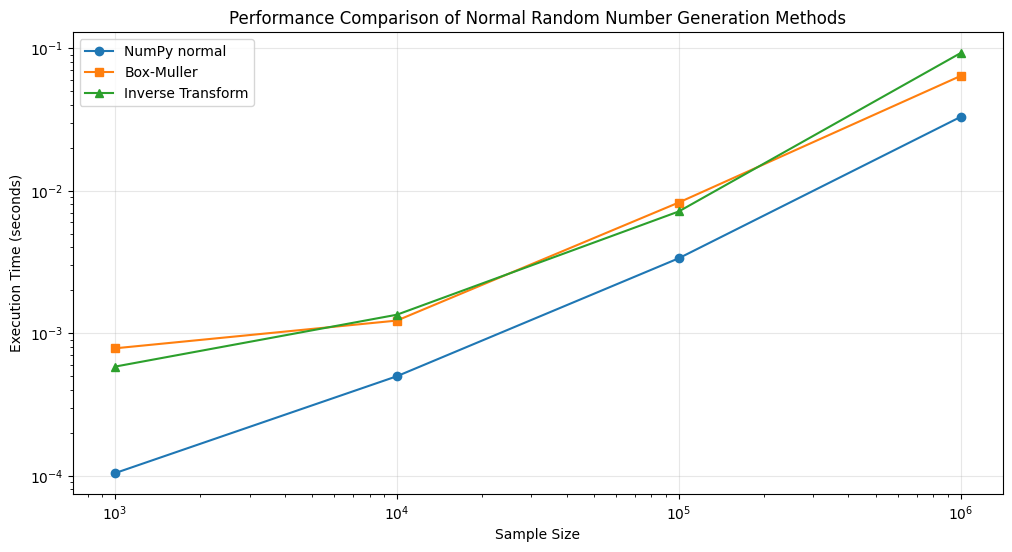

In [ ]:
import time
import numpy as np
from scipy.stats import norm

def time_function(func, *args, **kwargs):
    """Measure execution time of a function"""
    start_time = time.time()
    result = func(*args, **kwargs)
    end_time = time.time()
    return end_time - start_time, result

# Sample sizes to test
sample_sizes = [1000, 10000, 100000, 1000000]

# Results containers
times_numpy = []
times_box_muller = []
times_inverse = []

for size in sample_sizes:
    # Time NumPy's normal
    t_numpy, _ = time_function(np.random.normal, 0, 1, size)
    times_numpy.append(t_numpy)

    # Time Box-Muller
    t_bm, _ = time_function(box_muller, 0, 1, size)
    times_box_muller.append(t_bm)

    # Time Inverse Transform
    t_it, _ = time_function(inverse_normal, size)
    times_inverse.append(t_it)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(sample_sizes, times_numpy, 'o-', label='NumPy normal')
plt.plot(sample_sizes, times_box_muller, 's-', label='Box-Muller')
plt.plot(sample_sizes, times_inverse, '^-', label='Inverse Transform')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Sample Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Performance Comparison of Normal Random Number Generation Methods')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### **Conclusion**

In this section, we’ve explored the generation of uniform and non-uniform pseudorandom numbers, essential components for statistical simulations, we’ve covered:

1.  The foundation of uniform random number generation, including the multiplicative congruential method and NumPy’s implementation.

2.  Methods for generating non-uniform random numbers, including:

    -   Inverse transform sampling for arbitrary distributions

    -   The Box-Muller algorithm for normal distributions

    -   Sampling from discrete distributions

3.  Practical applications for simulating sensor data with different noise profiles.

4.  Performance comparisons between different methods.

Understanding these techniques provides a solid foundation for further exploration of random variable transformations and resampling methods, which we’ll cover in subsequent sections. The ability to generate random
numbers from various distributions is fundamental
simulations, bootstrap resampling, and many other statistical techniques used in data analysis and modeling.

In the next section, we’ll delve into transformations of random variables, exploring how mathematical operations affect the distributions of random variables and how we can leverage these transformations in practical applications.

 **Sources:**
 - [(1) randomUniform — Python Wrappers for IMSL C Numerical Library](https://help.imsl.com/python/current/docs/stat/random/randomUniform.html)
 - [(2) Non-uniform random variate generation - Wikipedia](https://en.wikipedia.org/wiki/Non-uniform_random_variate_generation)
 - [(3) How to do inverse transformation sampling in scipy and numpy](https://tmramalho.github.io/blog/2013/12/16/how-to-do-inverse-transformation-sampling-in-scipy-and-numpy/)
 - [(4) Box-Muller Algorithm by Python](https://rh8liuqy.github.io/Box_Muller_Algorithm.html)
 - [(5) numpy.random.uniform — NumPy v2.2 Manual](https://numpy.org/doc/2.2/reference/random/generated/numpy.random.uniform.html)
 - [(6) NumPy: Uniform, non-uniform random sample](https://www.w3resource.com/python-exercises/numpy/basic/numpy-basic-exercise-49.php)
 - [(7) peterewills/itsample: Inverse transform sampling in Python - GitHub](https://github.com/peterewills/itsample)
 - [(8) Part 3 : The Box-Müller transformation, Python code. - YouTube](https://www.youtube.com/embed/YhLokU9qDj4?autoplay=1&color=white&playsinline=true&enablejsapi=1&origin=https%3A%2F%2Fwww.perplexity.ai&widgetid=1&forigin=https%3A%2F%2Fwww.perplexity.ai%2Fsearch%2Flet-s-continue-preparing-our-c-HmrN5hxfSVSkGxaST5iqew&aoriginsup=1&gporigin=https%3A%2F%2Fwww.perplexity.ai%2Fsearch%2Flet-s-continue-preparing-our-c-HmrN5hxfSVSkGxaST5iqew&vf=6)
 - [(9) Analysis of Pseudorandom Number Generator in Python](https://www.semanticscholar.org/paper/e946e1f05b9f2ae0fdf64246d70c1fbdc7545590)
 - [(10) Increasing precision of uniform pseudorandom number generators](https://arxiv.org/abs/1401.8230)
 - [(11) Python Random uniform() Method - W3Schools](https://www.w3schools.com/python/ref_random_uniform.asp)
 - [(12) Generating a non uniform discrete random variable](https://math.stackexchange.com/questions/48919/generating-a-non-uniform-discrete-random-variable)
 - [(13) Fast Python implementation of Inverse Transform Sampling for an …](https://gist.github.com/amarvutha/c2a3ea9d42d238551c694480019a6ce1)
 - [(14) Box–Muller transform - Wikipedia](https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform)

## Transformations of random variables.
 Transformation is a fundamental concept in probability theory with wide-ranging applications across statistics, data science, and sensor data analysis. Understanding how to manipulate random variables through various transformations provides powerful tools for modeling complex systems, analyzing data distributions, and developing sophisticated simulation techniques. It is a powerful tool in probability theory and statistical analysis, offering several key utilities:

###v 1. **Distributional Flexibility**

Transformations allow you to convert random variables from one distribution to another, enabling the modeling of complex phenomena with simpler distributions. For example, transforming a uniform random variable into a normal random variable using the Box-Muller transformation facilitates simulations involving normal distributions.

#### 2. **Statistical Analysis and Inference**

Transformations can make data more suitable for statistical analysis by stabilizing variance, normalizing distributions, or achieving linearity. For instance, logarithmic transformations are often used to stabilize variance in data that exhibits non-constant variance across different levels of the independent variable.

#### 3. **Data Calibration and Standardization**

In many applications, raw data needs to be transformed to match physical units or to align with theoretical models. Linear transformations are commonly used for calibration and standardization, such as converting temperature readings from Celsius to Fahrenheit.

#### 4. **Robustness and Outlier Reduction**

Certain transformations, like the logarithmic or square root transformation, can reduce the impact of outliers by compressing the scale of extreme values. This is particularly useful in datasets with skewed distributions.

#### 5. **Modeling Complex Relationships**

Transformations can help model complex relationships between variables. For example, polynomial transformations can capture nonlinear relationships, while logarithmic transformations can model multiplicative effects.

#### 6. **Generating Samples from Complex Distributions**

Transformations are essential in Monte Carlo simulations for generating samples from complex distributions. By starting with simple distributions (e.g., uniform) and applying appropriate transformations, you can simulate data from virtually any distribution.

#### 7. **Improving Model Fit**

In regression analysis, transformations can improve the fit of models by ensuring that assumptions such as linearity and homoscedasticity are met. For instance, transforming both the dependent and independent variables can help achieve these assumptions.


###**Theoretical Foundations of Random Variable Transformations**
When we transform a random variable, we are essentially applying a function to map one random variable to another. If we have a random variable X with a known probability distribution, and we apply a function g to obtain $Y = g(X)$, the distribution of Y will generally differ from that of X. The challenge lies in determining how the probability distribution changes under this transformation.

### The Change of Variables Formula
For continuous random variables, the change of variables formula provides a direct method for finding the probability density function (PDF) of a transformed random variable. If X is a continuous random variable with PDF $f_X(x)$, and $Y = g(X)$ where g is a one-to-one, differentiable function, then the PDF of Y can be determined using the formula:

$f_Y(y) = f_X(g^{-1}(y)) \left| \frac{d}{dy}g^{-1}(y) \right|$

where $g^{-1}$ is the inverse function of g, and the absolute value term
represents the Jacobian of the transformation [1](https://stats.libretexts.org/Bookshelves/Probability_Theory/Probability_Mathematical_Statistics_and_Stochastic_Processes_(Siegrist)/03:_Distributions/3.07:_Transformations_of_Random_Variables).

This formula can be understood intuitively as adjusting the original
density to account for the “stretching” or “compressing” effect of the
transformation. For instance, if we have a linear transformation $Y = aX + b$ (where a ≠ 0), the PDF of Y is related to the PDF of X by:

$f_Y(y) = \frac{1}{|a|} f_X\left(\frac{y-b}{a}\right)$

The Jacobian in this case is simply 1/\|a\|, reflecting how the linear
transformation scales the probability density [1](https://stats.libretexts.org/Bookshelves/Probability_Theory/Probability_Mathematical_Statistics_and_Stochastic_Processes_(Siegrist)/03:_Distributions/3.07:_Transformations_of_Random_Variables) [2](https://www.le.ac.uk/users/dsgp1/COURSES/LEISTATS/STATSLIDE4.pdf).

### Distribution Function Technique

An alternative approach to finding the distribution of a transformed
random variable is the distribution function technique. This method
involves:

1.  Finding the cumulative distribution function (CDF) of $Y: F_Y(y) = P(Y ≤ y)$

2.  Expressing this in terms of $X: F_Y(y) = P(g(X) ≤ y)$

3.  Finding the region in the X-space where $g(X) ≤ y$

4.  Integrating the PDF of X over this region

5.  Differentiating the resulting CDF to obtain the PDF of Y

This technique is particularly useful when the transformation is not
one-to-one or when working with multivariate transformations [8](https://faculty.sites.iastate.edu/ahallam/files/inline-files/Transformations.pdf).

### Transformations of Continuous Random Variables

Various transformations of continuous random variables arise in statistical applications, each with its own properties and uses.

#### Linear Transformations

The simplest transformation is the linear transformation $Y = aX + b$. For
such transformations, the properties of the random variable change
predictably:

1.  Expected value: $E(Y) = aE(X) + b$

2.  Variance: $Var(Y) = a²Var(X)$

These relationships make linear transformations particularly useful in
standardizing random variables (creating Z-scores) or adjusting scales
and units [14](https://www.math.umd.edu/~millson/teaching/STAT400fall18/slides/article9.pdf).

#### Inverse Transform Sampling

As we have already learned, Inverse Transform Sampling is a technique for generating random variables with a specific distribution. The method relies on the fact that if F is the CDF of a random variable X, then the random variable $Y = F(X)$ follows a uniform distribution. Conversely, if U is uniform, then $X = F^{-1}(U)$ has the distribution with CDF F [1](https://stats.libretexts.org/Bookshelves/Probability_Theory/Probability_Mathematical_Statistics_and_Stochastic_Processes_(Siegrist)/03:_Distributions/3.07:_Transformations_of_Random_Variables), [3](https://towardsdatascience.com/generate-random-variable-using-inverse-transform-method-in-python-8e5392f170a3/).
#### Power Transformations

Power transformations, such as the square or cube of a random variable,
are common in statistical modeling. Let’s consider a simple example: if
X follows a uniform distribution, what is the distribution of $Y = X²$?

To find this, we apply the change of variables formula. The inverse
function is $g^{-1}(y) = √y$, with derivative $d/dy g^{-1}(y) = 1/(2√y)$.
Thus:
$f_Y(y) = f_X(\sqrt{y}) \cdot \frac{1}{2\sqrt{y}} = \frac{1}{2\sqrt{y}}$
for 0 ≤ y ≤ 1, and 0 elsewhere [1](https://stats.libretexts.org/Bookshelves/Probability_Theory/Probability_Mathematical_Statistics_and_Stochastic_Processes_(Siegrist)/03:_Distributions/3.07:_Transformations_of_Random_Variables).

This results in a distribution with more mass near zero, illustrating how nonlinear transformations can significantly alter the shape of distributions
[8](https://faculty.sites.iastate.edu/ahallam/files/inline-files/Transformations.pdf).

### Transformations of Discrete Random Variables

For discrete random variables, the transformation process follows different rules but maintains the same conceptual foundation.

#### General Formula for Discrete Transformations
If X is a discrete random variable with probability mass function (PMF)
$p_X(x)$, and $Y = g(X)$, then the PMF of Y is given by:

$p_Y(y) = \sum_{x: g(x)=y} p_X(x)$

This formula sums the probabilities of all x values that map to the same
y value under the transformation g [8](https://faculty.sites.iastate.edu/ahallam/files/inline-files/Transformations.pdf)
[14](https://www.math.umd.edu/~millson/teaching/STAT400fall18/slides/article9.pdf).

For example, consider a random variable X with PMF:

-   P(X = -1) = 1/4

-   P(X = 0) = 1/2

-   P(X = 1) = 1/4

If we apply the transformation Y = X², the possible values of Y are 0
(from X = 0) and 1 (from both X = -1 and X = 1). Therefore:

-   P(Y = 0) = P(X = 0) = 1/2

-   P(Y = 1) = P(X = -1) + P(X = 1) = 1/4 + 1/4 = 1/2

This example illustrates an important property of transformations of discrete random variables: multiple values of X can map to the same value of Y, leading to a “coalescing” of probabilities [14](https://www.math.umd.edu/~millson/teaching/STAT400fall18/slides/article9.pdf).

### Linear Transformations of Discrete Random Variables

For a linear transformation $Y = aX + b$ of a discrete random variable X,
we have:

-  $E(Y) = aE(X) + b$

-   $Var(Y) = a²Var(X)$

These formulas mirror those for continuous random variables, highlighting the universality of these properties across different types of random variables
[14](https://www.math.umd.edu/~millson/teaching/STAT400fall18/slides/article9.pdf).

### Special Transformations and Their Applications

Certain transformations have particular significance in statistical applications due to their mathematical properties or their relevance to
specific domains.

#### Logarithmic Transformations

Logarithmic transformations are often applied to data with skewed
distributions to achieve normality or to stabilize variance. If X is a
positive random variable and $Y = ln(X)$, the PDF of Y can be found using
the change of variables formula. For example, if X follows an exponential distribution with parameter λ, then Y = ln(X) follows a Gumbel distribution. This transformation is the basis for modeling extreme values in fields such as hydrology and insurance [11](https://apps.dtic.mil/sti/tr/pdf/ADA533718.pdf).

#### Arcsine Transformation for Random Walks

The arcsine transformation is particularly useful in analyzing random
walk data. In the theory of random walks, certain variables follow the
arcsine distribution, which is symmetric over the interval \[-1, 1\].
This distribution models the proportion of time a random walk spends above zero, the time of the maximum of a random walk, and other important features of stochastic processes [4](https://www.extrica.com/article/24105).

The transformation process involves applying the inverse arcsine function to the original random walk data:

$Y = \arcsin(2X - 1)$

where X represents the normalized position of the random walk. This
transformation ensures that Y follows an arcsine distribution, offering
advantages for statistical analysis due to its well-defined properties
[4](https://www.extrica.com/article/24105).

### Applications to Sensor Data Analysis

Transformations of random variables are particularly relevant in sensor
data analysis, where raw measurements often need conversion to physically meaningful quantities or require adjustment for sensor characteristics.

#### Calibration and Unit Conversion

In sensor applications, linear transformations are frequently used for
calibration and unit conversion. For example, converting temperature from Celsius to Fahrenheit (T_F = 1.8 \* T_C + 32) or adjusting raw voltage readings to physical quantities [5](https://www.pluralsight.com/projects/decoding-sensor-data-using-python), [12](https://blog.endaq.com/transforming-your-shock-vibration-data-with-python). Let’s implement a simple calibration transformation for our simulated temperature sensor data. This code demonstrates a linear calibration transformation applied to our simulated temperature sensor data. The transformation corrects for gain and offset errors in the sensor, ensuring more accurate temperature readings [12](https://blog.endaq.com/transforming-your-shock-vibration-data-with-python).


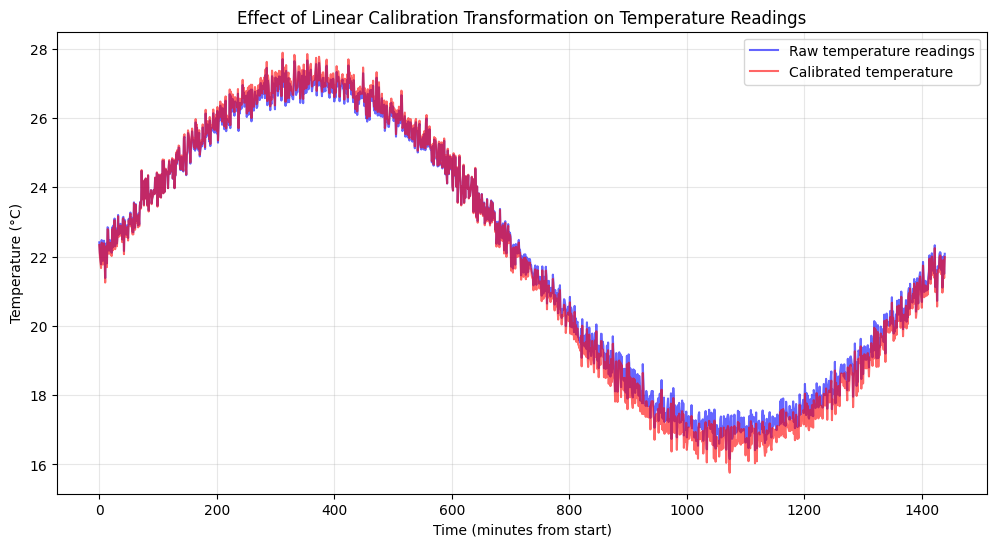

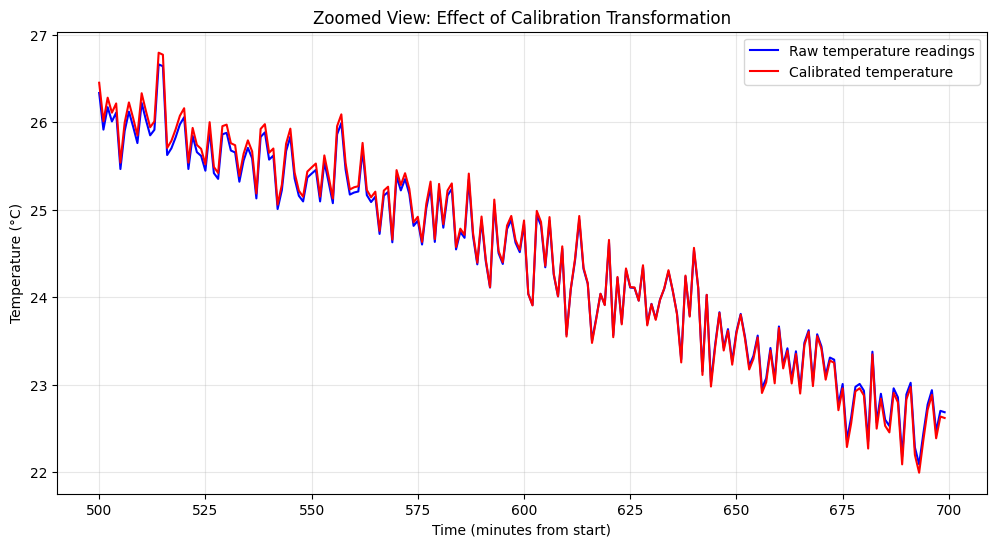

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Function for Box-Muller from previous code
def box_muller(mu=0, sigma=1, n_samples=1000, seed=None):
    rng = np.random.RandomState(seed)
    half_samples = n_samples // 2
    s = rng.uniform(0, 1, half_samples)
    t = rng.uniform(0, 1, half_samples)
    r = np.sqrt(-2 * np.log(s))
    theta = 2 * np.pi * t
    x = mu + sigma * r * np.cos(theta)
    y = mu + sigma * r * np.sin(theta)
    return np.vstack((x, y)).T

# Set seed for reproducibility
np.random.seed(42)

# Create time series (1 sample per minute for 24 hours)
start_time = datetime(2025, 3, 1, 0, 0)
timestamps = [start_time + timedelta(minutes=i) for i in range(24*60)]
time_indices = np.arange(len(timestamps))

# Base temperature model (daily cycle)
base_temp = 22 + 5 * np.sin(2 * np.pi * time_indices / (24 * 60))

# Generate normal noise using Box-Muller
normal_samples = box_muller(mu=0, sigma=0.3, n_samples=2*len(time_indices), seed=42)
normal_noise = normal_samples[:len(time_indices), 0]

# Raw sensor readings (simulated)
raw_temp = base_temp + normal_noise

# Apply calibration transformation
# Simulating a sensor that requires linear calibration: y = ax + b
# where x is raw reading and y is calibrated reading
a = 1.05  # Gain correction
b = -1.2  # Offset correction
calibrated_temp = a * raw_temp + b

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(time_indices, raw_temp, 'b-', alpha=0.6, label='Raw temperature readings')
plt.plot(time_indices, calibrated_temp, 'r-', alpha=0.6, label='Calibrated temperature')
plt.xlabel('Time (minutes from start)')
plt.ylabel('Temperature (°C)')
plt.title('Effect of Linear Calibration Transformation on Temperature Readings')
plt.legend()
plt.grid(True, alpha=0.3)

# Zoom in to see the difference more clearly
plt.figure(figsize=(12, 6))
zoom_start, zoom_end = 500, 700
plt.plot(time_indices[zoom_start:zoom_end], raw_temp[zoom_start:zoom_end], 'b-', label='Raw temperature readings')
plt.plot(time_indices[zoom_start:zoom_end], calibrated_temp[zoom_start:zoom_end], 'r-', label='Calibrated temperature')
plt.xlabel('Time (minutes from start)')
plt.ylabel('Temperature (°C)')
plt.title('Zoomed View: Effect of Calibration Transformation')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



## **Univariate and Bivariate Transformations**

In sensor applications, we often encounter two types of calibration
transformations:

1.  Univariate transforms: These apply a transformation based solely on     the raw sensor reading.

2.  Bivariate transforms: These incorporate a second variable (often    temperature) to compensate for temperature-dependent sensor behavior, particularly in piezo-resistive sensors [12](https://blog.endaq.com/transforming-your-shock-vibration-data-with-python).

The general form of a bivariate transform for a temperature-compensated
accelerometer might be:

$y = a_0 + a_1x + a_2T + a_3xT$

where x is the raw accelerometer reading, T is the temperature, and y is
the calibrated reading. The coefficients a₀, a₁, a₂, and a₃ are
determined during sensor calibration [12](https://blog.endaq.com/transforming-your-shock-vibration-data-with-python).

## **Practical Considerations in Implementing Transformations**
When implementing transformations of random variables in practice,
several important considerations should be kept in mind:

### Numerical Stability

Some transformations, particularly those involving logarithms or powers,
can lead to numerical instability. For example, computing ln(X) when X
is very close to zero can result in large negative values or overflow
errors. Similar issues arise with exponentiation of large values. Care
must be taken to handle edge cases and potential numerical issues [11](https://apps.dtic.mil/sti/tr/pdf/ADA533718.pdf).

### Effect on Statistical Properties

Transformations can significantly alter the statistical properties of
random variables, including moments, quantiles, and dependence
structures. For instance, nonlinear transformations generally do not
preserve correlations between variables. Understanding these effects is
crucial when interpreting transformed data [9](https://en.wikipedia.org/wiki/Probability_density_function).

### Inverse Transformations

In many applications, it’s necessary to transform data for analysis and
then inverse-transform the results back to the original scale. Ensuring
the consistency of these transformations—that the inverse transformation
properly undoes the forward transformation—is essential for meaningful
interpretation [12](https://blog.endaq.com/transforming-your-shock-vibration-data-with-python).

### **Conclusions**

Transformations of random variables represent a powerful set of
techniques in probability theory and statistical analysis. By applying
functions to random variables, we can:

1.  Generate samples from complex distributions using simpler, more     tractable distributions

2.  Convert raw sensor data into calibrated, physically meaningful     measurements

3.  Analyze data in transformed spaces where statistical properties are     more favorable

4.  Model complex systems through combinations of simpler random processes

The change of variables formula provides a rigorous mathematical
foundation for understanding how probability distributions transform,
while practical techniques like inverse transform sampling enable
efficient implementation in computational settings.

In our next section, we will explore resampling techniques including
Bootstrap and Jackknife methods, which leverage transformations of
random variables to estimate statistical properties from limited data.
These methods build upon the theoretical foundations we’ve established
and provide powerful tools for robust statistical inference.

**Sources:**
- [(1) randomUniform — Python Wrappers for IMSL C Numerical Library …](https://help.imsl.com/python/current/docs/stat/random/randomUniform.html)
- [(2) Non-uniform random variate generation - Wikipedia](https://en.wikipedia.org/wiki/Non-uniform_random_variate_generation)
- [(3) How to do inverse transformation sampling in scipy and numpy](https://tmramalho.github.io/blog/2013/12/16/how-to-do-inverse-transformation-sampling-in-scipy-and-numpy/)
- [(4) Box-Muller Algorithm by Python](https://rh8liuqy.github.io/Box_Muller_Algorithm.html)
- [(5) numpy.random.uniform — NumPy v2.2 Manual](https://numpy.org/doc/2.2/reference/random/generated/numpy.random.uniform.html)
- [(6) NumPy: Uniform, non-uniform random sample from a given 1-D …](https://www.w3resource.com/python-exercises/numpy/basic/numpy-basic-exercise-49.php)
- [(7) peterewills/itsample: Inverse transform sampling in Python - GitHub](https://github.com/peterewills/itsample)
- (8) Part 3 : The Box-Müller transformation, Python code. - YouTube
- [(9) Analysis of Pseudorandom Number Generator in Python](https://www.semanticscholar.org/paper/e946e1f05b9f2ae0fdf64246d70c1fbdc7545590)
- [(10) The System of Geo-Simulation Modeling of Thermokarst Lakes Fields Based on the Log-Normal Distribution of Their Sizes](https://www.semanticscholar.org/paper/57e936652ae9c9057a63e4e3b9a1fbf36f04c79e)
- [(11) Reproducibility, energy efficiency and performance of pseudorandom number generators in machine learning: a comparative study of python, numpy, tensorflow, and pytorch implementations](https://arxiv.org/abs/2401.17345)
- [(12) PyGellermann: a Python tool to generate pseudorandom series for human and non-human animal behavioural experiments](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10320995/)
- [(13) Uniform and non-uniform pseudorandom number generators in a genetic algorithm applied to an order picking problem](https://www.semanticscholar.org/paper/f6edbdf7f8fb94e224606d41bb3479abae84d9cb)
- [(14) gobbli: A uniform interface to deep learning for text in Python](https://www.semanticscholar.org/paper/136a055892e543ae25423a5ccf8de24a09f0b7b7)
- [(15) Six-directional pseudorandom consecutive unicursal polishing path for suppressing mid-spatial frequency error and realizing consecutive uniform coverage.](https://pubmed.ncbi.nlm.nih.gov/31873338/)
- [(16) Python Non-Uniform Fast Fourier Transform (PyNUFFT): An Accelerated Non-Cartesian MRI Package on a Heterogeneous Platform (CPU/GPU)](https://www.semanticscholar.org/paper/eec4250cd41df38a4f1ed1952129048d93caf777)
- [(17) pySRURGS - a python package for symbolic regression by uniform random global search](https://www.semanticscholar.org/paper/138bec821673277ae1bf4d18faf3fbac8632f005)
- [(18) Increasing precision of uniform pseudorandom number generators](https://arxiv.org/abs/1401.8230)
- [(19) Python Random uniform() Method - W3Schools](https://www.w3schools.com/python/ref_random_uniform.asp)
- [(20) Generating a non uniform discrete random variable](https://math.stackexchange.com/questions/48919/generating-a-non-uniform-discrete-random-variable)
- [(21) Fast Python implementation of Inverse Transform Sampling for an …](https://gist.github.com/amarvutha/c2a3ea9d42d238551c694480019a6ce1)
- [(22) Box–Muller transform - Wikipedia](https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform)
- [(23) Python \| Random Module \| .uniform() - Codecademy](https://www.codecademy.com/resources/docs/python/random-module/uniform)
- [(24) Pseudorandom Number Generation with Specific Non-Uniform …](https://stackoverflow.com/questions/4536949/pseudorandom-number-generation-with-specific-non-uniform-distributions)
- [(25) Fast arbitrary distribution random sampling (inverse transform …](https://stackoverflow.com/questions/21100716/fast-arbitrary-distribution-random-sampling-inverse-transform-sampling)
- [(26) How to generate random x and y coordinates using box muller …](https://stackoverflow.com/questions/57335218/how-to-generate-random-x-and-y-coordinates-using-box-muller-transformation)
- [(27) random – Pseudorandom number generators - PyMOTW 3](https://pymotw.com/2/random/)
- [(28) Universal Non-Uniform Random Number Sampling in SciPy](https://docs.scipy.org/doc/scipy/tutorial/stats/sampling.html)
- [(29) Generate Random Variable Using Inverse Transform Method in …](https://towardsdatascience.com/generate-random-variable-using-inverse-transform-method-in-python-8e5392f170a3/)


## **Resampling: Bootstrap and Jackknife**
  Resampling methods allow us to assess the accuracy of sample statistics by using subsets of available data or drawing randomly with replacement from a set of data points. These techniques are particularly valuable when dealing with complex statistical problems where traditional parametric approaches may be insufficient or when the underlying distribution is unknown.
  
### Fundamentals of Resampling Methods

Resampling techniques emerged as computational power increased, offering
alternatives to classical approaches that rely heavily on distributional
assumptions. These methods use the observed data to generate multiple
samples, which can then be used to estimate the sampling distribution of
a statistic, construct confidence intervals, or test hypotheses.

### Why Use Resampling?

Traditional statistical methods often assume that data follows specific
probability distributions, such as the normal distribution. However,
real-world data frequently violates these assumptions. Consider our
sensor data from previous examples—sensor readings may exhibit skewness,
multimodality, or other departures from normality due to environmental
factors or sensor characteristics.

Resampling methods provide robust alternatives that make fewer
assumptions about the underlying data distribution. As noted in the
research literature, resampling is particularly valuable when dealing
with nonlinear estimators, where traditional formulas may yield biased
results [2](https://github.com/bkrueger/resampling). For instance, if
you’re interested in the squared mean of a quantity and its associated
errors, using standard estimators might lead to biased results, making
resampling methods the preferred approach.

### **Bootstrap Resampling**

Bootstrap, introduced by Bradley Efron in 1979, is a computationally
intensive procedure that involves repeatedly drawing samples with replacement from the original dataset to estimate the sampling distribution of a statistic.

### Theoretical Foundations

The fundamental idea behind bootstrap is simple yet powerful: if we have
a sample that’s representative of a population, then resampling from
this sample (with replacement) should mimic sampling from the original
population. By generating numerous bootstrap samples and calculating the
statistic of interest for each, we can approximate its sampling
distribution.

Mathematically, if we have a sample $X = {x_1, x_2, ..., x_n}$ and
we’re interested in a statistic $T(X)$, the bootstrap procedure
generates $B$ resamples ${x_1, x_2, ..., x_B}$, each obtained by
sampling $n$ observations from $X$ with replacement. For each resample,
we compute the statistic $T(X_b)$, giving us a distribution of
bootstrap statistics that approximates the sampling distribution of
$T(X)$.

Let’s implement bootstrap resampling in Python. We’ll use both a manual
approach and the specialized functions available in SciPy:


Original data mean: 22.0120
Bootstrap mean: 22.0123
95% CI for mean: [21.8235, 22.1945]

Original data std: 3.5357
Bootstrap std: 3.5341
95% CI for std: [3.4648, 3.6030]


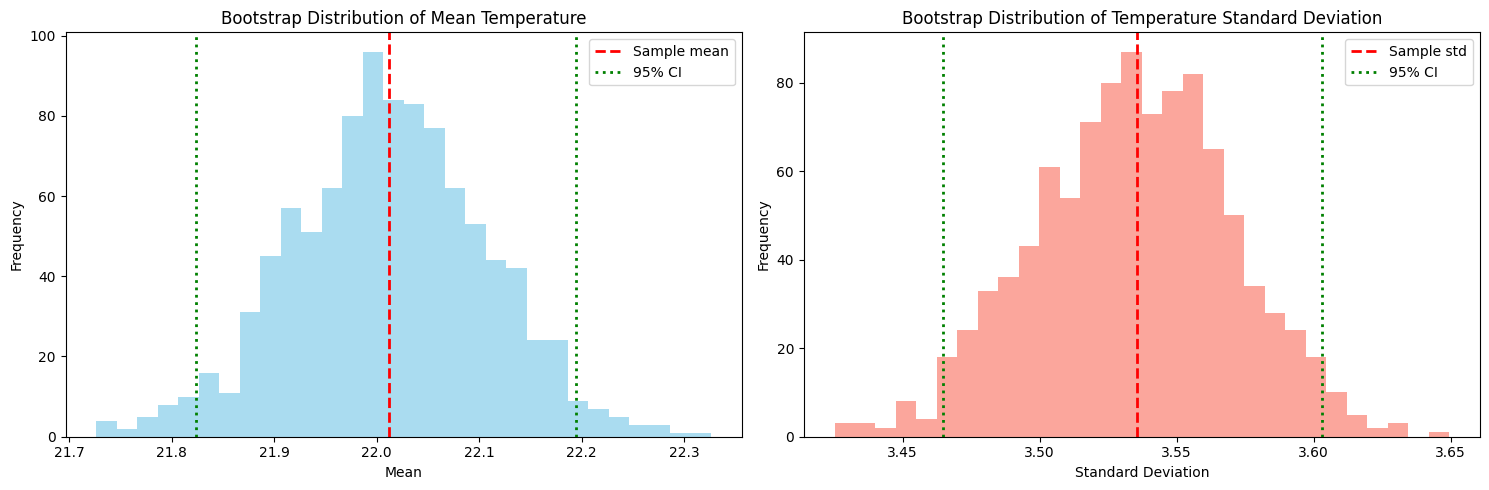

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from datetime import datetime, timedelta

# Set seed for reproducibility
np.random.seed(42)

def bootstrap_manual(data, statistic, n_resamples=1000):
    """
    Manually perform bootstrap resampling for a given statistic.

    Parameters:
    -----------
    data : array-like
        Original data sample
    statistic : function
        Function to compute the desired statistic
    n_resamples : int
        Number of bootstrap resamples to generate

    Returns:
    --------
    bootstrap_statistics : ndarray
        Array of bootstrap statistics
    """
    n = len(data)
    bootstrap_statistics = np.zeros(n_resamples)

    for i in range(n_resamples):
        # Generate a bootstrap sample by sampling with replacement
        bootstrap_sample = np.random.choice(data, size=n, replace=True)

        # Compute the statistic for this bootstrap sample
        bootstrap_statistics[i] = statistic(bootstrap_sample)

    return bootstrap_statistics

# Let's create our simulated temperature sensor data again
# Base parameters for our synthetic sensor data
start_time = datetime(2025, 3, 1, 0, 0)
timestamps = [start_time + timedelta(minutes=i) for i in range(24*60)]
time_indices = np.arange(len(timestamps))

# Base temperature model (daily cycle)
base_temp = 22 + 5 * np.sin(2 * np.pi * time_indices / (24 * 60))
normal_noise = np.random.normal(0, 0.3, len(time_indices))
temp_readings = base_temp + normal_noise

# Let's compute the mean and standard deviation using bootstrap
mean_statistic = lambda x: np.mean(x)
std_statistic = lambda x: np.std(x)

# Generate bootstrap distributions
bootstrap_means = bootstrap_manual(temp_readings, mean_statistic, n_resamples=1000)
bootstrap_stds = bootstrap_manual(temp_readings, std_statistic, n_resamples=1000)

# Calculate 95% confidence intervals
mean_ci = np.percentile(bootstrap_means, [2.5, 97.5])
std_ci = np.percentile(bootstrap_stds, [2.5, 97.5])

# Print results
print(f"Original data mean: {np.mean(temp_readings):.4f}")
print(f"Bootstrap mean: {np.mean(bootstrap_means):.4f}")
print(f"95% CI for mean: [{mean_ci[0]:.4f}, {mean_ci[1]:.4f}]")
print()
print(f"Original data std: {np.std(temp_readings):.4f}")
print(f"Bootstrap std: {np.mean(bootstrap_stds):.4f}")
print(f"95% CI for std: [{std_ci[0]:.4f}, {std_ci[1]:.4f}]")

# Visualize the bootstrap distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot bootstrap distribution of the mean
ax1.hist(bootstrap_means, bins=30, alpha=0.7, color='skyblue')
ax1.axvline(np.mean(temp_readings), color='red', linestyle='--', linewidth=2, label='Sample mean')
ax1.axvline(mean_ci[0], color='green', linestyle=':', linewidth=2, label='95% CI')
ax1.axvline(mean_ci[1], color='green', linestyle=':', linewidth=2)
ax1.set_title('Bootstrap Distribution of Mean Temperature')
ax1.set_xlabel('Mean')
ax1.set_ylabel('Frequency')
ax1.legend()

# Plot bootstrap distribution of the standard deviation
ax2.hist(bootstrap_stds, bins=30, alpha=0.7, color='salmon')
ax2.axvline(np.std(temp_readings), color='red', linestyle='--', linewidth=2, label='Sample std')
ax2.axvline(std_ci[0], color='green', linestyle=':', linewidth=2, label='95% CI')
ax2.axvline(std_ci[1], color='green', linestyle=':', linewidth=2)
ax2.set_title('Bootstrap Distribution of Temperature Standard Deviation')
ax2.set_xlabel('Standard Deviation')
ax2.set_ylabel('Frequency')
ax2.legend()

plt.tight_layout()
plt.show()


Mean difference between sensors: -0.4993
95% CI for mean difference: [-0.7459, -0.2449]


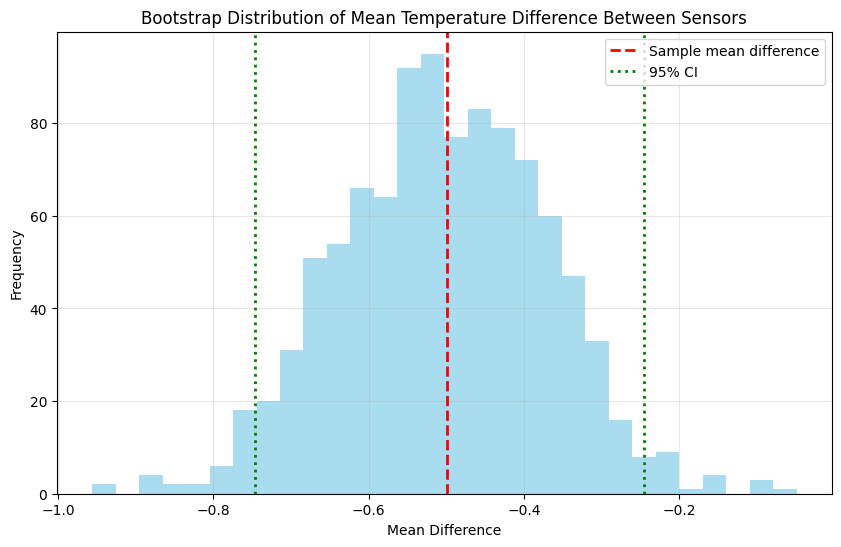

In [ ]:
from scipy.stats import bootstrap

# Define a statistic function that takes multiple arguments
def mean_diff(x, y):
    return np.mean(x) - np.mean(y)

# Create two temperature sensors with different offsets
temp_readings1 = base_temp + np.random.normal(0, 0.3, len(time_indices))
temp_readings2 = base_temp + 0.5 + np.random.normal(0, 0.3, len(time_indices))

# Perform bootstrap using SciPy
result = bootstrap((temp_readings1, temp_readings2), mean_diff, n_resamples=1000)

# Extract results
conf_interval = result.confidence_interval
bootstrap_distribution = result.bootstrap_distribution

print(f"Mean difference between sensors: {mean_diff(temp_readings1, temp_readings2):.4f}")
print(f"95% CI for mean difference: [{conf_interval.low:.4f}, {conf_interval.high:.4f}]")

# Plot bootstrap distribution of the mean difference
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_distribution, bins=30, alpha=0.7, color='skyblue')
plt.axvline(mean_diff(temp_readings1, temp_readings2), color='red', linestyle='--',
           linewidth=2, label='Sample mean difference')
plt.axvline(conf_interval.low, color='green', linestyle=':',
           linewidth=2, label='95% CI')
plt.axvline(conf_interval.high, color='green', linestyle=':', linewidth=2)
plt.title('Bootstrap Distribution of Mean Temperature Difference Between Sensors')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### **Bootstrap for Variance Estimation**

One of the primary applications of bootstrap is to estimate the variance
or standard error of a statistic. This is especially valuable when the
theoretical variance formula is complex or unknown, as is often the case
with complex statistics or transformations. For instance, we can use bootstrap to estimate the variance of the correlation coefficient between two sensor measurements:


Original correlation: 0.9994
Bootstrap standard error: 0.0000
95% CI for correlation: [0.9993, 0.9994]


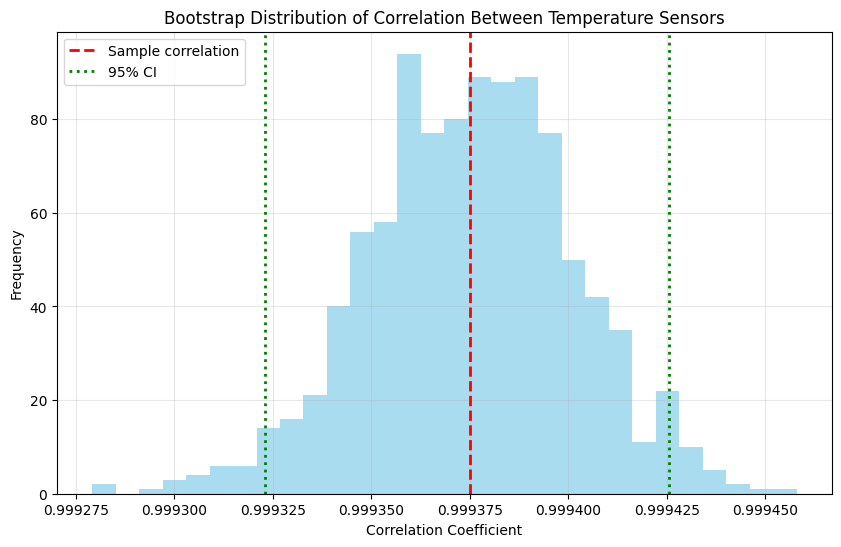

In [ ]:
# Create a second temperature sensor with some correlation to the first
temp_readings_correlated = base_temp + 0.7*normal_noise + 0.3*np.random.normal(0, 0.3, len(time_indices))

# Calculate the Pearson correlation coefficient
def correlation(x, y):
    return np.corrcoef(x, y)[0, 1]

corr_original = correlation(temp_readings, temp_readings_correlated)

# Bootstrap the correlation coefficient
n_resamples = 1000
bootstrap_correlations = np.zeros(n_resamples)

for i in range(n_resamples):
    # Generate indices for bootstrap sample
    indices = np.random.choice(len(time_indices), size=len(time_indices), replace=True)

    # Create bootstrap sample for both sensors
    x_bootstrap = temp_readings[indices]
    y_bootstrap = temp_readings_correlated[indices]

    # Calculate correlation for this bootstrap sample
    bootstrap_correlations[i] = correlation(x_bootstrap, y_bootstrap)

# Calculate standard error and confidence interval
corr_se = np.std(bootstrap_correlations)
corr_ci = np.percentile(bootstrap_correlations, [2.5, 97.5])

print(f"Original correlation: {corr_original:.4f}")
print(f"Bootstrap standard error: {corr_se:.4f}")
print(f"95% CI for correlation: [{corr_ci[0]:.4f}, {corr_ci[1]:.4f}]")

# Visualize the bootstrap distribution
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_correlations, bins=30, alpha=0.7, color='skyblue')
plt.axvline(corr_original, color='red', linestyle='--', linewidth=2, label='Sample correlation')
plt.axvline(corr_ci[0], color='green', linestyle=':', linewidth=2, label='95% CI')
plt.axvline(corr_ci[1], color='green', linestyle=':', linewidth=2)
plt.title('Bootstrap Distribution of Correlation Between Temperature Sensors')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### **Jackknife Resampling**

While the bootstrap creates random resamples with replacement, the
jackknife takes a more deterministic approach by systematically leaving
out one observation at a time.

### Theoretical Foundations

The jackknife method works by creating n leave-one-out samples from a dataset of size n. Each jackknife sample consists of the original data with one observation removed. The statistic of interest is then computed for each of these samples.

For a sample $X = {x_1, x_2, ..., x_n}$ and a statistic $T(X)$, the
jackknife procedure generates n samples
$X_{(1)}, X_{(2)}, ..., X_{(n)}$, where $X_{(i)}$ is the sample X
with the i-th observation removed. The jackknife estimate of the
statistic is then typically the average of these leave-one-out
statistics.

The jackknife estimate of the standard error is:

$SE_{jack} = \sqrt{\frac{n-1}{n} \sum_{i=1}^{n} (T(X_{(i)}) - T_{(\cdot)})^2}$

where $T\_{(\\cdot)}$$ is the average of the leave-one-out statistics.

Let’s implement the jackknife method to estimate the mean and its
standard error for our temperature sensor data:


Original data mean: 22.0753
Jackknife mean: 22.0753
Jackknife SE for mean: 0.7420
Jackknife bias for mean: 0.0000

Original data std: 3.5587
Jackknife std: 3.5548
Jackknife SE for std: 0.2811
Jackknife bias for std: -0.0885


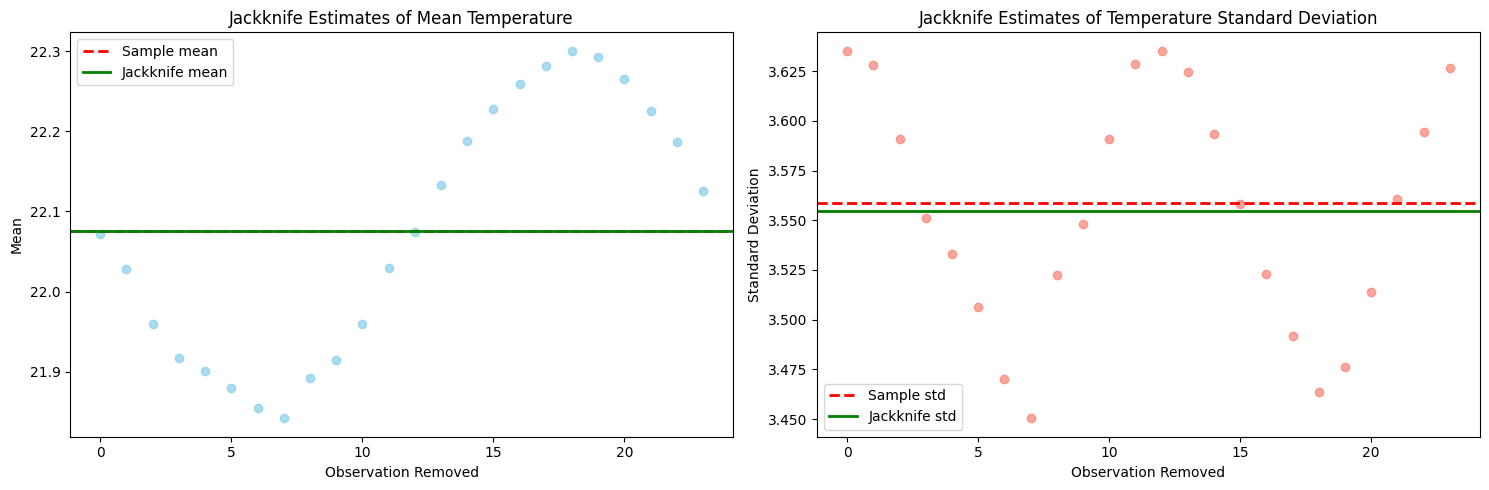

In [ ]:
def jackknife(data, statistic):
    """
    Perform jackknife resampling for a given statistic.

    Parameters:
    -----------
    data : array-like
        Original data sample
    statistic : function
        Function to compute the desired statistic

    Returns:
    --------
    jack_stat : float
        Jackknife estimate of the statistic
    jack_se : float
        Jackknife estimate of the standard error
    jack_bias : float
        Jackknife estimate of bias
    jack_values : ndarray
        Array of leave-one-out statistics
    """
    n = len(data)
    jack_values = np.zeros(n)

    # Calculate the statistic for the full sample
    full_stat = statistic(data)

    # Calculate the leave-one-out statistics
    for i in range(n):
        # Create the leave-one-out sample
        jack_sample = np.delete(data, i)

        # Compute the statistic for this jackknife sample
        jack_values[i] = statistic(jack_sample)

    # Calculate the jackknife estimate and its standard error
    jack_stat = np.mean(jack_values)
    jack_se = np.sqrt(((n-1)/n) * np.sum((jack_values - np.mean(jack_values))**2))

    # Calculate the jackknife estimate of bias
    jack_bias = (n-1) * (jack_stat - full_stat)

    return jack_stat, jack_se, jack_bias, jack_values

# Apply jackknife to our temperature sensor data
# For this example, we'll use a smaller subset to make the computation manageable
hourly_temps = temp_readings[::60]  # One reading per hour

# Jackknife for the mean
jack_mean, jack_mean_se, jack_mean_bias, jack_mean_values = jackknife(hourly_temps, np.mean)

# Jackknife for the standard deviation
jack_std, jack_std_se, jack_std_bias, jack_std_values = jackknife(hourly_temps, np.std)

# Print results
print(f"Original data mean: {np.mean(hourly_temps):.4f}")
print(f"Jackknife mean: {jack_mean:.4f}")
print(f"Jackknife SE for mean: {jack_mean_se:.4f}")
print(f"Jackknife bias for mean: {jack_mean_bias:.4f}")
print()
print(f"Original data std: {np.std(hourly_temps):.4f}")
print(f"Jackknife std: {jack_std:.4f}")
print(f"Jackknife SE for std: {jack_std_se:.4f}")
print(f"Jackknife bias for std: {jack_std_bias:.4f}")

# Visualize the jackknife results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot jackknife values for the mean
ax1.scatter(range(len(hourly_temps)), jack_mean_values, alpha=0.7, color='skyblue')
ax1.axhline(np.mean(hourly_temps), color='red', linestyle='--', linewidth=2, label='Sample mean')
ax1.axhline(jack_mean, color='green', linestyle='-', linewidth=2, label='Jackknife mean')
ax1.set_title('Jackknife Estimates of Mean Temperature')
ax1.set_xlabel('Observation Removed')
ax1.set_ylabel('Mean')
ax1.legend()

# Plot jackknife values for the standard deviation
ax2.scatter(range(len(hourly_temps)), jack_std_values, alpha=0.7, color='salmon')
ax2.axhline(np.std(hourly_temps), color='red', linestyle='--', linewidth=2, label='Sample std')
ax2.axhline(jack_std, color='green', linestyle='-', linewidth=2, label='Jackknife std')
ax2.set_title('Jackknife Estimates of Temperature Standard Deviation')
ax2.set_xlabel('Observation Removed')
ax2.set_ylabel('Standard Deviation')
ax2.legend()

plt.tight_layout()
plt.show()


### Jackknife for Bias Reduction

One of the primary uses of the jackknife is to reduce bias in estimators. In statistical estimation, **bias** refers to the difference between the expected value of an estimator and the true value of the parameter it is estimating. An estimator is said to be **unbiased** if its expected value equals the true parameter value. However, many estimators are biased due to the nature of the data or the estimation method. Therefore, **bias reduction** involves techniques or methods that aim to minimize or eliminate the bias in an estimator. The goal is to make the estimator's expected value closer to the true parameter value, thereby improving the accuracy of the estimation.

The jackknife bias-corrected estimator is given by:

$$ T_{jack} = n \cdot T(X) - (n-1) \cdot \frac{1}{n} \sum_{i=1}^{n} T(X_{(i)})$$
where:

- $T(X)$ is the original estimator based on the full dataset.
- $T(X_{(i)})$ is the estimator computed after leaving out the i-th observation.
- $n$ is the number of observations in the dataset.

This formula effectively subtracts an estimate of the bias from the original estimator, leading to a bias-corrected estimate.
Let’s apply this to estimate the variance of our temperature readings:


In [ ]:
def jackknife_bias_corrected(data, statistic):
    """
    Calculate the bias-corrected jackknife estimate of a statistic.

    Parameters:
    -----------
    data : array-like
        Original data sample
    statistic : function
        Function to compute the desired statistic

    Returns:
    --------
    corrected_stat : float
        Bias-corrected estimate of the statistic
    """
    n = len(data)

    # Calculate the statistic for the full sample
    full_stat = statistic(data)

    # Calculate the leave-one-out statistics
    jack_values = np.zeros(n)
    for i in range(n):
        jack_sample = np.delete(data, i)
        jack_values[i] = statistic(jack_sample)

    # Calculate the bias-corrected estimate
    jack_mean = np.mean(jack_values)
    corrected_stat = n * full_stat - (n-1) * jack_mean

    return corrected_stat

# Calculate the variance using different methods
sample_var = np.var(hourly_temps, ddof=0)  # Biased variance
unbiased_var = np.var(hourly_temps, ddof=1)  # Unbiased variance
jackknife_var = jackknife_bias_corrected(hourly_temps, lambda x: np.var(x, ddof=0))

print(f"Biased sample variance: {sample_var:.4f}")
print(f"Unbiased variance: {unbiased_var:.4f}")
print(f"Jackknife bias-corrected variance: {jackknife_var:.4f}")


Biased sample variance: 12.6642
Unbiased variance: 13.2148
Jackknife bias-corrected variance: 13.2148


## Comparing Bootstrap and Jackknife

Both bootstrap and jackknife are powerful resampling techniques, but
they differ in their approach and characteristics. Understanding these
differences can help in choosing the appropriate method for a specific
application.

### Computational Aspects

Jackknife is more orderly and deterministic than bootstrap, as it
systematically removes one observation at a time [3](https://www.datasciencecentral.com/resampling-methods-comparison/). This makes it computationally simpler in some respects, as the procedure is the same for each subsample. However, for larger datasets, jackknife can become computationally intensive since it requires n repetitions for a sample of size n.

Bootstrap, on the other hand, requires B repetitions, where B is typically chosen by the analyst (commonly around 1000). This gives more flexibility but also introduces a “cushion error” due to the finite number of resamples
[3](https://www.datasciencecentral.com/resampling-methods-comparison/).

### Statistical Performance

In most cases, as noted by Efron (1982), the bootstrap tends to outperform the jackknife in terms of statistical accuracy [3](https://www.datasciencecentral.com/resampling-methods-comparison/). Bootstrap generally produces more reliable estimates of standard errors and confidence intervals, particularly for complex statistics or transformations.

However, the jackknife can be more suitable in certain scenarios:

-   For small original data samples, the jackknife may be more appropriate
    [3](https://www.datasciencecentral.com/resampling-methods-comparison/)

-   The jackknife tends to perform better for confidence interval estimation for pairwise agreement measures [3](https://www.datasciencecentral.com/resampling-methods-comparison/)

-   The jackknife gives the same results every time, which can be    advantageous for reproducibility [3](https://www.datasciencecentral.com/resampling-methods-comparison/)

Bootstrap, on the other hand, performs better for skewed distributions
and generally provides more accurate estimates in most applications
[3](https://www.datasciencecentral.com/resampling-methods-comparison/).

### Variance Estimation

Comparing the bootstrap and jackknife for variance estimation is important because both methods offer different approaches to assessing the variability of statistical estimates, and each has its own strengths and limitations.

1. **Statistical Accuracy**:
    - **Bootstrap**: Generally provides more accurate estimates of variance, especially for complex statistics or when the underlying distribution is unknown. It can handle non-linear transformations and non-normal data well.
    - **Jackknife**: Offers a more straightforward and deterministic approach, which can be advantageous for small datasets or when computational resources are limited. However, it might not perform as well as the bootstrap for certain types of statistics.
2. **Robustness to Assumptions**:
    - **Bootstrap**: Does not rely heavily on distributional assumptions, making it robust for a wide range of data types.
    - **Jackknife**: Also does not require specific distributional assumptions but can be less robust than the bootstrap for certain types of data or statistics.
3. **Interpretability and Reproducibility**:
    - **Bootstrap**: Provides a distribution of estimates, allowing for the construction of confidence intervals and visualization of variability. However, results can vary slightly between runs due to random resampling.
    - **Jackknife**: Offers a deterministic result, which can be beneficial for reproducibility. However, it does not provide a distribution of estimates like the bootstrap.

Let’s compare the bootstrap and jackknife estimates of standard error
for the mean of our temperature data:


In [ ]:
# Generate bootstrap distribution of the mean
n_resamples = 1000
bootstrap_means = bootstrap_manual(hourly_temps, np.mean, n_resamples)

# Calculate bootstrap standard error
bootstrap_se = np.std(bootstrap_means)

# Calculate jackknife standard error using our function
_, jackknife_se, _, _ = jackknife(hourly_temps, np.mean)

# Calculate the theoretical standard error
theoretical_se = np.std(hourly_temps, ddof=1) / np.sqrt(len(hourly_temps))

print(f"Theoretical standard error: {theoretical_se:.6f}")
print(f"Bootstrap standard error: {bootstrap_se:.6f}")
print(f"Jackknife standard error: {jackknife_se:.6f}")

Theoretical standard error: 0.742036
Bootstrap standard error: 0.729408
Jackknife standard error: 0.742036


### Confidence Interval Estimation

Confidence interval estimation is a statistical technique used to estimate the range of values within which a population parameter is likely to lie. It provides a measure of the reliability of an estimate by quantifying the amount of uncertainty associated with it.

#### Key Concepts

1. **Confidence Level**: This is the probability that the interval will contain the true population parameter. Common confidence levels are 90%, 95%, and 99%.
2. **Interval Width**: The width of the confidence interval indicates the precision of the estimate. A narrower interval suggests greater precision.
3. **Margin of Error**: This is half the width of the confidence interval and represents how far the sample estimate may be from the true population parameter.

Different methods can be used to construct confidence intervals from
bootstrap samples:

1.  Percentile method: Using the empirical percentiles of the bootstrap     distribution

2.  Basic bootstrap method: Based on the difference between the original     estimate and the bootstrap estimates

3.  BCa (bias-corrected and accelerated) method: Adjusts for bias and     non-constant variance

Let’s implement and compare these methods for our temperature data:


In [ ]:
def bootstrap_confidence_intervals(data, statistic, n_resamples=1000, alpha=0.05):
    """
    Calculate bootstrap confidence intervals using different methods.

    Parameters:
    -----------
    data : array-like
        Original data sample
    statistic : function
        Function to compute the desired statistic
    n_resamples : int
        Number of bootstrap resamples
    alpha : float
        Significance level (e.g., 0.05 for 95% confidence)

    Returns:
    --------
    ci_percentile : tuple
        Confidence interval using the percentile method
    ci_basic : tuple
        Confidence interval using the basic bootstrap method
    """
    n = len(data)
    theta_hat = statistic(data)

    # Generate bootstrap samples and compute the statistic
    bootstrap_statistics = np.zeros(n_resamples)

    for i in range(n_resamples):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        bootstrap_statistics[i] = statistic(bootstrap_sample)

    # Percentile method
    ci_percentile = (
        np.percentile(bootstrap_statistics, 100 * (alpha/2)),
        np.percentile(bootstrap_statistics, 100 * (1 - alpha/2))
    )

    # Basic bootstrap method
    ci_basic = (
        2 * theta_hat - np.percentile(bootstrap_statistics, 100 * (1 - alpha/2)),
        2 * theta_hat - np.percentile(bootstrap_statistics, 100 * (alpha/2))
    )

    return ci_percentile, ci_basic

# Apply to our temperature data for the mean
mean_ci_percentile, mean_ci_basic = bootstrap_confidence_intervals(
    hourly_temps, np.mean, n_resamples=1000, alpha=0.05
)

print(f"Original mean: {np.mean(hourly_temps):.4f}")
print(f"95% CI (Percentile method): [{mean_ci_percentile[0]:.4f}, {mean_ci_percentile[1]:.4f}]")
print(f"95% CI (Basic bootstrap method): [{mean_ci_basic[0]:.4f}, {mean_ci_basic[1]:.4f}]")


Original mean: 22.0753
95% CI (Percentile method): [20.6196, 23.4609]
95% CI (Basic bootstrap method): [20.6898, 23.5311]


### Advanced Applications

#### K-Repeated Jackknife

The K-repeated jackknife is an extension of the standard jackknife
method, where the resampling process is repeated K times. This approach
can offer improved performance in certain scenarios, particularly for
variance estimation.

The basic steps as described in the literature are [7](https://jmasm.com/index.php/jmasm/article/download/732/733/2923):

1.  Start with the original sample

2.  Compute the standard jackknife estimates by leaving one observation out at a time

3.  Use these estimates to form pseudo samples

4.  Repeat the process K times, using the estimates from each iteration to generate samples for the next iteration

#### Bootstrap for Time Series Data

When working with time series data, such as our temperature sensor readings, special consideration must be given to the temporal structure. Simple bootstrap resampling would break the time dependence. Instead, we can use block bootstrap methods that preserve the temporal structure.


In [ ]:
def block_bootstrap(data, block_length, statistic, n_resamples=1000):
    """
    Perform moving block bootstrap for time series data.

    Parameters:
    -----------
    data : array-like
        Time series data
    block_length : int
        Length of blocks
    statistic : function
        Function to compute the desired statistic
    n_resamples : int
        Number of bootstrap resamples

    Returns:
    --------
    bootstrap_statistics : ndarray
        Array of bootstrap statistics
    """
    n = len(data)
    n_blocks = int(np.ceil(n / block_length))
    bootstrap_statistics = np.zeros(n_resamples)

    for i in range(n_resamples):
        # Generate random starting indices for blocks
        start_indices = np.random.randint(0, n - block_length + 1, size=n_blocks)

        # Create bootstrap sample by concatenating blocks
        blocks = [data[j:j+block_length] for j in start_indices]
        bootstrap_sample = np.concatenate(blocks)[:n]  # Ensure correct length

        # Compute the statistic
        bootstrap_statistics[i] = statistic(bootstrap_sample)

    return bootstrap_statistics

# Apply block bootstrap to our full temperature time series
block_length = 60  # 1-hour blocks
block_bootstrap_means = block_bootstrap(temp_readings, block_length, np.mean, n_resamples=1000)

# Calculate confidence interval
block_bootstrap_ci = np.percentile(block_bootstrap_means, [2.5, 97.5])

print(f"Original mean: {np.mean(temp_readings):.4f}")
print(f"Block Bootstrap mean: {np.mean(block_bootstrap_means):.4f}")
print(f"95% CI: [{block_bootstrap_ci[0]:.4f}, {block_bootstrap_ci[1]:.4f}]")


Original mean: 22.0120
Block Bootstrap mean: 22.0286
95% CI: [20.5439, 23.4936]


### Practical Example: Reliability Analysis of Sensor Measurements

Let’s apply bootstrap and jackknife to analyze the reliability of our
temperature sensor readings. We’ll simulate situations where the sensor
occasionally produces outliers or malfunctions.


True mean (without outliers): 22.0120
Sample mean (with outliers): 22.0753
Trimmed mean (with outliers): 22.0614

Bootstrap mean 95% CI: [20.6318, 23.4594]
Bootstrap trimmed mean 95% CI: [20.4039, 23.8724]

Jackknife mean 95% CI: [20.6209, 23.5297]
Jackknife trimmed mean 95% CI: [20.3621, 23.7607]


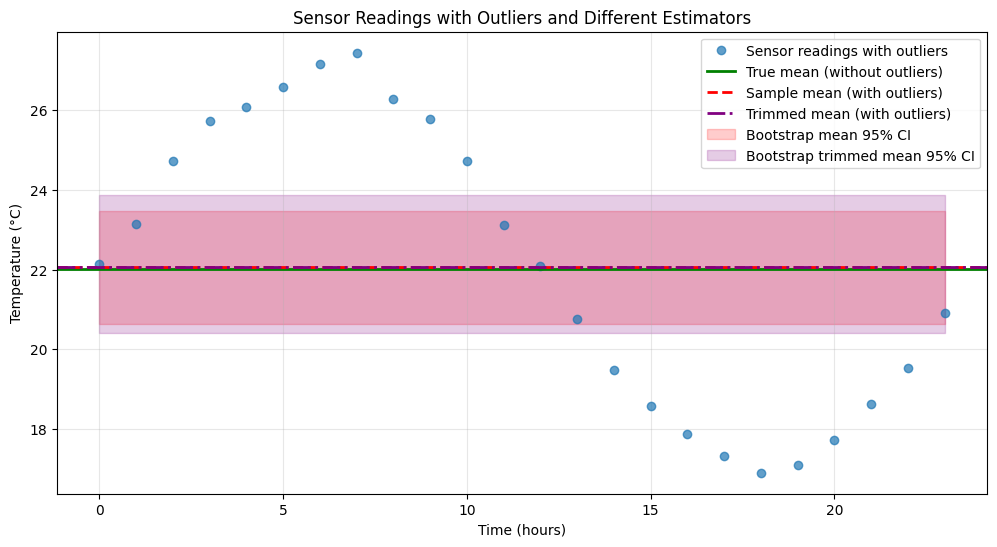

In [ ]:
# Simulate sensor with occasional outliers
np.random.seed(42)
n_samples = len(time_indices)
outlier_probability = 0.05  # 5% chance of outlier

# Generate base readings
base_readings = base_temp + np.random.normal(0, 0.3, n_samples)

# Add outliers
outlier_mask = np.random.random(n_samples) < outlier_probability
outlier_values = np.random.normal(30, 5, np.sum(outlier_mask))  # Outliers around 30°C
noisy_readings = base_readings.copy()
noisy_readings[outlier_mask] = outlier_values

# Define a robust measure of central tendency (trimmed mean)
def trimmed_mean(x, proportion=0.1):
    """Calculate trimmed mean by removing extreme values"""
    return stats.trim_mean(x, proportion)

# Compare bootstrap and jackknife for standard mean vs. trimmed mean
# For brevity, we'll use a subset of the data
data_subset = noisy_readings[::60]  # One reading per hour

# Bootstrap standard mean
bootstrap_means = bootstrap_manual(data_subset, np.mean, n_resamples=1000)
bootstrap_mean_ci = np.percentile(bootstrap_means, [2.5, 97.5])

# Bootstrap trimmed mean
bootstrap_trimmed = bootstrap_manual(data_subset, lambda x: trimmed_mean(x, 0.1), n_resamples=1000)
bootstrap_trimmed_ci = np.percentile(bootstrap_trimmed, [2.5, 97.5])

# Jackknife standard mean
_, jack_mean_se, _, _ = jackknife(data_subset, np.mean)
jack_mean_ci = (
    np.mean(data_subset) - 1.96 * jack_mean_se,
    np.mean(data_subset) + 1.96 * jack_mean_se
)

# Jackknife trimmed mean
_, jack_trimmed_se, _, _ = jackknife(data_subset, lambda x: trimmed_mean(x, 0.1))
jack_trimmed_ci = (
    trimmed_mean(data_subset, 0.1) - 1.96 * jack_trimmed_se,
    trimmed_mean(data_subset, 0.1) + 1.96 * jack_trimmed_se
)

# Print results
print(f"True mean (without outliers): {np.mean(base_readings):.4f}")
print(f"Sample mean (with outliers): {np.mean(data_subset):.4f}")
print(f"Trimmed mean (with outliers): {trimmed_mean(data_subset, 0.1):.4f}")
print()
print(f"Bootstrap mean 95% CI: [{bootstrap_mean_ci[0]:.4f}, {bootstrap_mean_ci[1]:.4f}]")
print(f"Bootstrap trimmed mean 95% CI: [{bootstrap_trimmed_ci[0]:.4f}, {bootstrap_trimmed_ci[1]:.4f}]")
print()
print(f"Jackknife mean 95% CI: [{jack_mean_ci[0]:.4f}, {jack_mean_ci[1]:.4f}]")
print(f"Jackknife trimmed mean 95% CI: [{jack_trimmed_ci[0]:.4f}, {jack_trimmed_ci[1]:.4f}]")

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(range(len(data_subset)), data_subset, 'o', alpha=0.7, label='Sensor readings with outliers')
plt.axhline(np.mean(base_readings), color='green', linestyle='-', linewidth=2,
           label='True mean (without outliers)')
plt.axhline(np.mean(data_subset), color='red', linestyle='--', linewidth=2,
           label='Sample mean (with outliers)')
plt.axhline(trimmed_mean(data_subset, 0.1), color='purple', linestyle='-.', linewidth=2,
           label='Trimmed mean (with outliers)')
plt.fill_between(range(len(data_subset)),
                [bootstrap_mean_ci[0]]*len(data_subset),
                [bootstrap_mean_ci[1]]*len(data_subset),
                color='red', alpha=0.2, label='Bootstrap mean 95% CI')
plt.fill_between(range(len(data_subset)),
                [bootstrap_trimmed_ci[0]]*len(data_subset),
                [bootstrap_trimmed_ci[1]]*len(data_subset),
                color='purple', alpha=0.2, label='Bootstrap trimmed mean 95% CI')
plt.title('Sensor Readings with Outliers and Different Estimators')
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### Computational Efficiency Considerations

As mentioned earlier, jackknife requires n repetitions for a sample of
size n, while bootstrap requires B repetitions, where B is chosen by the
analyst. This can lead to significant differences in computational
efficiency, especially for large datasets. Let’s compare the execution time of bootstrap and jackknife for different sample sizes:


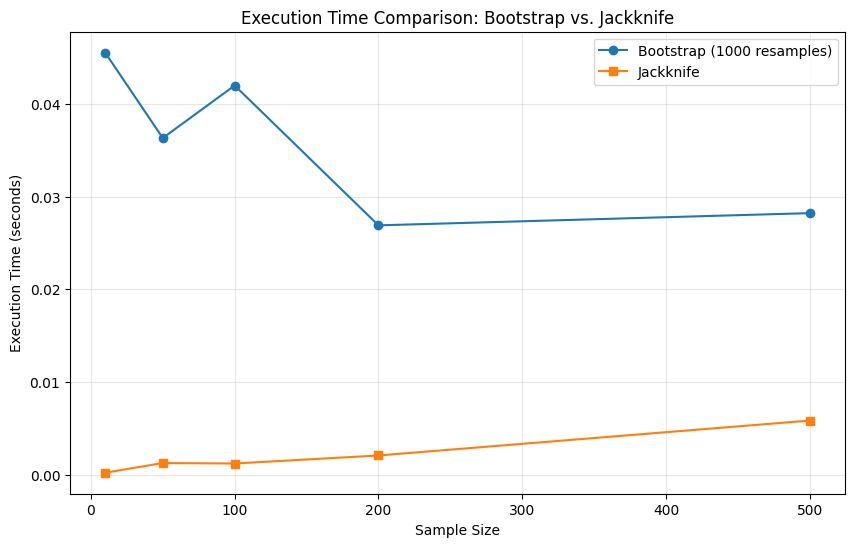

In [ ]:
import time

def execution_time(func, *args, **kwargs):
    """Measure execution time of a function"""
    start_time = time.time()
    result = func(*args, **kwargs)
    end_time = time.time()
    return end_time - start_time, result

# Sample sizes to test
sample_sizes = [10, 50, 100, 200, 500]

# Results containers
times_bootstrap = []
times_jackknife = []

for size in sample_sizes:
    # Generate random data
    data = np.random.normal(0, 1, size)

    # Time bootstrap (1000 resamples)
    t_bootstrap, _ = execution_time(bootstrap_manual, data, np.mean, 1000)
    times_bootstrap.append(t_bootstrap)

    # Time jackknife
    t_jackknife, _ = execution_time(jackknife, data, np.mean)
    times_jackknife.append(t_jackknife)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, times_bootstrap, 'o-', label='Bootstrap (1000 resamples)')
plt.plot(sample_sizes, times_jackknife, 's-', label='Jackknife')
plt.xlabel('Sample Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time Comparison: Bootstrap vs. Jackknife')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## **Conclusion**

Resampling techniques such as bootstrap and jackknife provide powerful
tools for statistical inference without relying heavily on
distributional assumptions. These methods are particularly valuable when
dealing with complex statistics, small sample sizes, or situations where
theoretical formulas are unavailable or difficult to derive.

The bootstrap method, with its random resampling approach, offers
flexibility and generally provides more accurate estimates across a wide
range of applications. It’s particularly well-suited for estimating
confidence intervals and standard errors of complex statistics, and it
performs well for skewed distributions.

The jackknife method, with its systematic leave-one-out approach,
provides a more deterministic alternative that can be particularly
useful for bias reduction and variance estimation. While it may not
perform as well as the bootstrap in many scenarios, it can be
advantageous for small samples and when reproducibility is a priority.

Both methods have their place in the statistician’s toolkit, and the
choice between them depends on the specific application, computational
constraints, and the properties of the statistic being estimated. In
many cases, applying both methods and comparing the results can provide
valuable insights into the robustness of the analysis.

In our next section, we will continue our exploration of random
variables by examining their role in more complex statistical models and
simulations.

Sources:
- [(1) bootstrap — SciPy v1.15.2 Manual](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html)
- [(2) Python module for doing resampling analysis (jackknife and
bootstrap)](https://github.com/bkrueger/resampling)
- [(3) Resampling Methods: Bootstrap vs jackknife - Data Science
Central](https://www.datasciencecentral.com/resampling-methods-comparison/)
- [(4) How to perform bootstrap and jackknife analysis? - Project
Guru](https://www.projectguru.in/bootstrap-jackknife-analysis/)
- [(5) Bootstrap resampling - Ethan Wicker](https://ethanwicker.com/2021-02-23-bootstrap-resampling-001/)
- [(6) jackknife_resampling — Astropy v7.1.dev594+gffc3d0ebc](https://docs.astropy.org/en/latest/api/astropy.stats.jackknife_resampling.html)
- [(7) PDF Survival Estimation Using Bootstrap, Jackknife and K-Repeated](https://jmasm.com/index.php/jmasm/article/download/732/733/2923)
- [(8) Chapter 17 Randomization, Jackknife, and Bootstrap \| Biology
723](https://bio723-class.github.io/Bio723-book/randomization-jackknife-and-bootstrap.html)
- [(9) Analyzing nested experimental designs—A user-friendly resampling
method to determine experimental significance](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9098003/)
- [(10) Bayesian Statistics with Python, No Resampling Necessary](https://www.semanticscholar.org/paper/49372b00c71a365879af0bc23f43bf279345e3fe)
- [(11) Avoiding Overfitting dan Overlapping in Handling Class Imbalanced
Using Hybrid Approach with Smoothed Bootstrap Resampling and Feature Selection](https://www.semanticscholar.org/paper/6e585ad4f5cccda6b252d743c6d627dcc0bfc13)
- [(12) Bootstrap Resampling in Gompertz Growth Model with Levenberg–Marquardt Iteration](https://www.semanticscholar.org/paper/3bfffbfdc410bf421d50775cedda1c5315cc871f)
- [(13) Bootstrap Resampling of Temporal Dominance of Sensations Curves to
Compute Uncertainties](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8535495/)
- [(14) On the Efficiency of Some Alpha Diversity Indices: A Simulation
Study Using Bootstrap Resampling](https://www.semanticscholar.org/paper/7a344119bc9ada8d2058ed360025ca83051011b4)

